<div class="alert alert-block alert-info">
<center> <h1> BUSINESS CASE 1: HOTEL CUSTOMER SEGMENTATION </h1> </center> <br>
<center> <h2> Group K </h2> </center> <br>
<center> Business Cases for Data Science </center>
<center> 2023/2024 </center>

**Table of Contents** <br>
* [1. Initial Setup](#setup)
    * [1.1. Import Libraries and General Definitions](#importlibraries)
    * [1.2. Import Data](#importdata)
* [2. Data Understanding](#dataunderstanding)
* [3. Data Preparation](#datapreparation)
    * [3.1. Identifying Inconsistencies](#inconsistencies)
    * [3.2. Duplicates](#dataimputation)
    * [3.3. Missing Values](#mv)
    * [3.4. Outlier Removal](#outlier)
        * [3.4.1. Visualization of Outliers](#graph)
        * [3.4.2. Manual Filter](#manualfilter)
        * [3.4.3. Z-Score Filter](#zscorefilter)
        * [3.4.4. Combining Z-score and Manual Filtering](#zscoremanual)
        * [3.4.5. Combining IQR and Manual Filtering](#iqrmanual)
    * [3.5. Feature Engineering](#fe)
    * [3.6. General Customer Description](#gcd)
    * [3.7. Feature Binning and One Hot Encoding](#binning)
    * [3.8. Feature Selection](#fs)
    * [3.9. Scalling the Data](#scalling)
* [4. Clustering](#clustering)
    * [4.1. PCA](#pca)
    * [4.2. Choosing the Best Number of Clusters](#bestnumber) 
        * [4.2.1. Elbow Method](#elbow)
        * [4.2.2. Davies Bouldin Score](#davies)
    * [4.3. Assessing Cluster Quality](#quality) 
    * [4.4. Clustering Results](#results) 
        

<hr>
<a class="anchor" id="setup">
    
# 1. Initial Setup
    
</a>

<a class="anchor" id="importlibraries">

## 1.1. Import Libraries and General Definitions 

</a>

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import os
import pycountry
import pycountry_convert as pc
from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import davies_bouldin_score
import matplotlib.ticker as ticker
import joypy
import category_encoders as ce
import collections
from scipy import stats
from sklearn.cluster import DBSCAN

In [112]:
#Display all the columns on the dataframe
pd.set_option('display.max_columns', None)

In [113]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8
plots_Title_fontSize = 14
plots_Title_textColour = 'black'
plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'
plots_barTexts_fontSize = 8

<a class="anchor" id="importlibraries">

## 1.2. Import Data

</a>

In [114]:
#read the data
df = pd.read_csv('Case1_HotelCustomerSegmentation.csv',sep=';')
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0


<hr>
<a class="anchor" id="dataunderstanding">
    
# 2. Data Understanding
    
    
</a>

In [115]:
#SET ID AS INDEX
df.set_index('ID', inplace=True)


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

In [117]:
# #MAKE A PROFILE REPORT
# profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
# profile.to_file("your_report.html")


THERE ARE DUPLICATE VALUES WITHIN THE CATEGORIES IN WHICH WE CAN IDENTIFY PEOPLE WITH
- DOCIDHASH
- NAMEHASH

In [118]:
#CREAT A LIST WITH EACH ONE OF THE TYPES OF VARIABLES, WITHOUT THE VARIABLE NATIONALITY
numerical_cols=['Age','AverageLeadTime','LodgingRevenue','OtherRevenue','BookingsCanceled','BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights']

binary_cols=['SRHighFloor','SRLowFloor','SRAccessibleRoom','SRMediumFloor','SRBathtub','SRShower','SRCrib','SRKingSizeBed','SRTwinBed','SRNearElevator','SRAwayFromElevator','SRNoAlcoholInMiniBar','SRQuietRoom']

categorical_cols=['DistributionChannel','MarketSegment']



In [119]:
#MAKE A DF WITH EACH ONE OF THE TYPES OF VARIABLES
df_numerical = df[numerical_cols]
df_binary = df[binary_cols]
df_categorical = df[categorical_cols]


In [120]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,107561.0,45.639191,17.244952,-10.0,33.0,47.0,58.0,123.00
AverageLeadTime,111733.0,60.833147,85.115320,-1.0,0.0,21.0,95.0,588.00
LodgingRevenue,111733.0,283.851283,379.131556,0.0,0.0,208.0,393.3,21781.00
OtherRevenue,111733.0,64.682802,123.580715,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,0.002282,0.080631,0.0,0.0,0.0,0.0,15.00
BookingsNoShowed,111733.0,0.000600,0.028217,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,111733.0,0.737607,0.730889,0.0,0.0,1.0,1.0,76.00
PersonsNights,111733.0,4.328318,4.630739,0.0,0.0,4.0,6.0,116.00
RoomNights,111733.0,2.203825,2.301637,0.0,0.0,2.0,3.0,185.00


THERE ARE NEGATIVE AGES AND AVERAGELEADTIMES THAT NEED TO BE ADRESSED

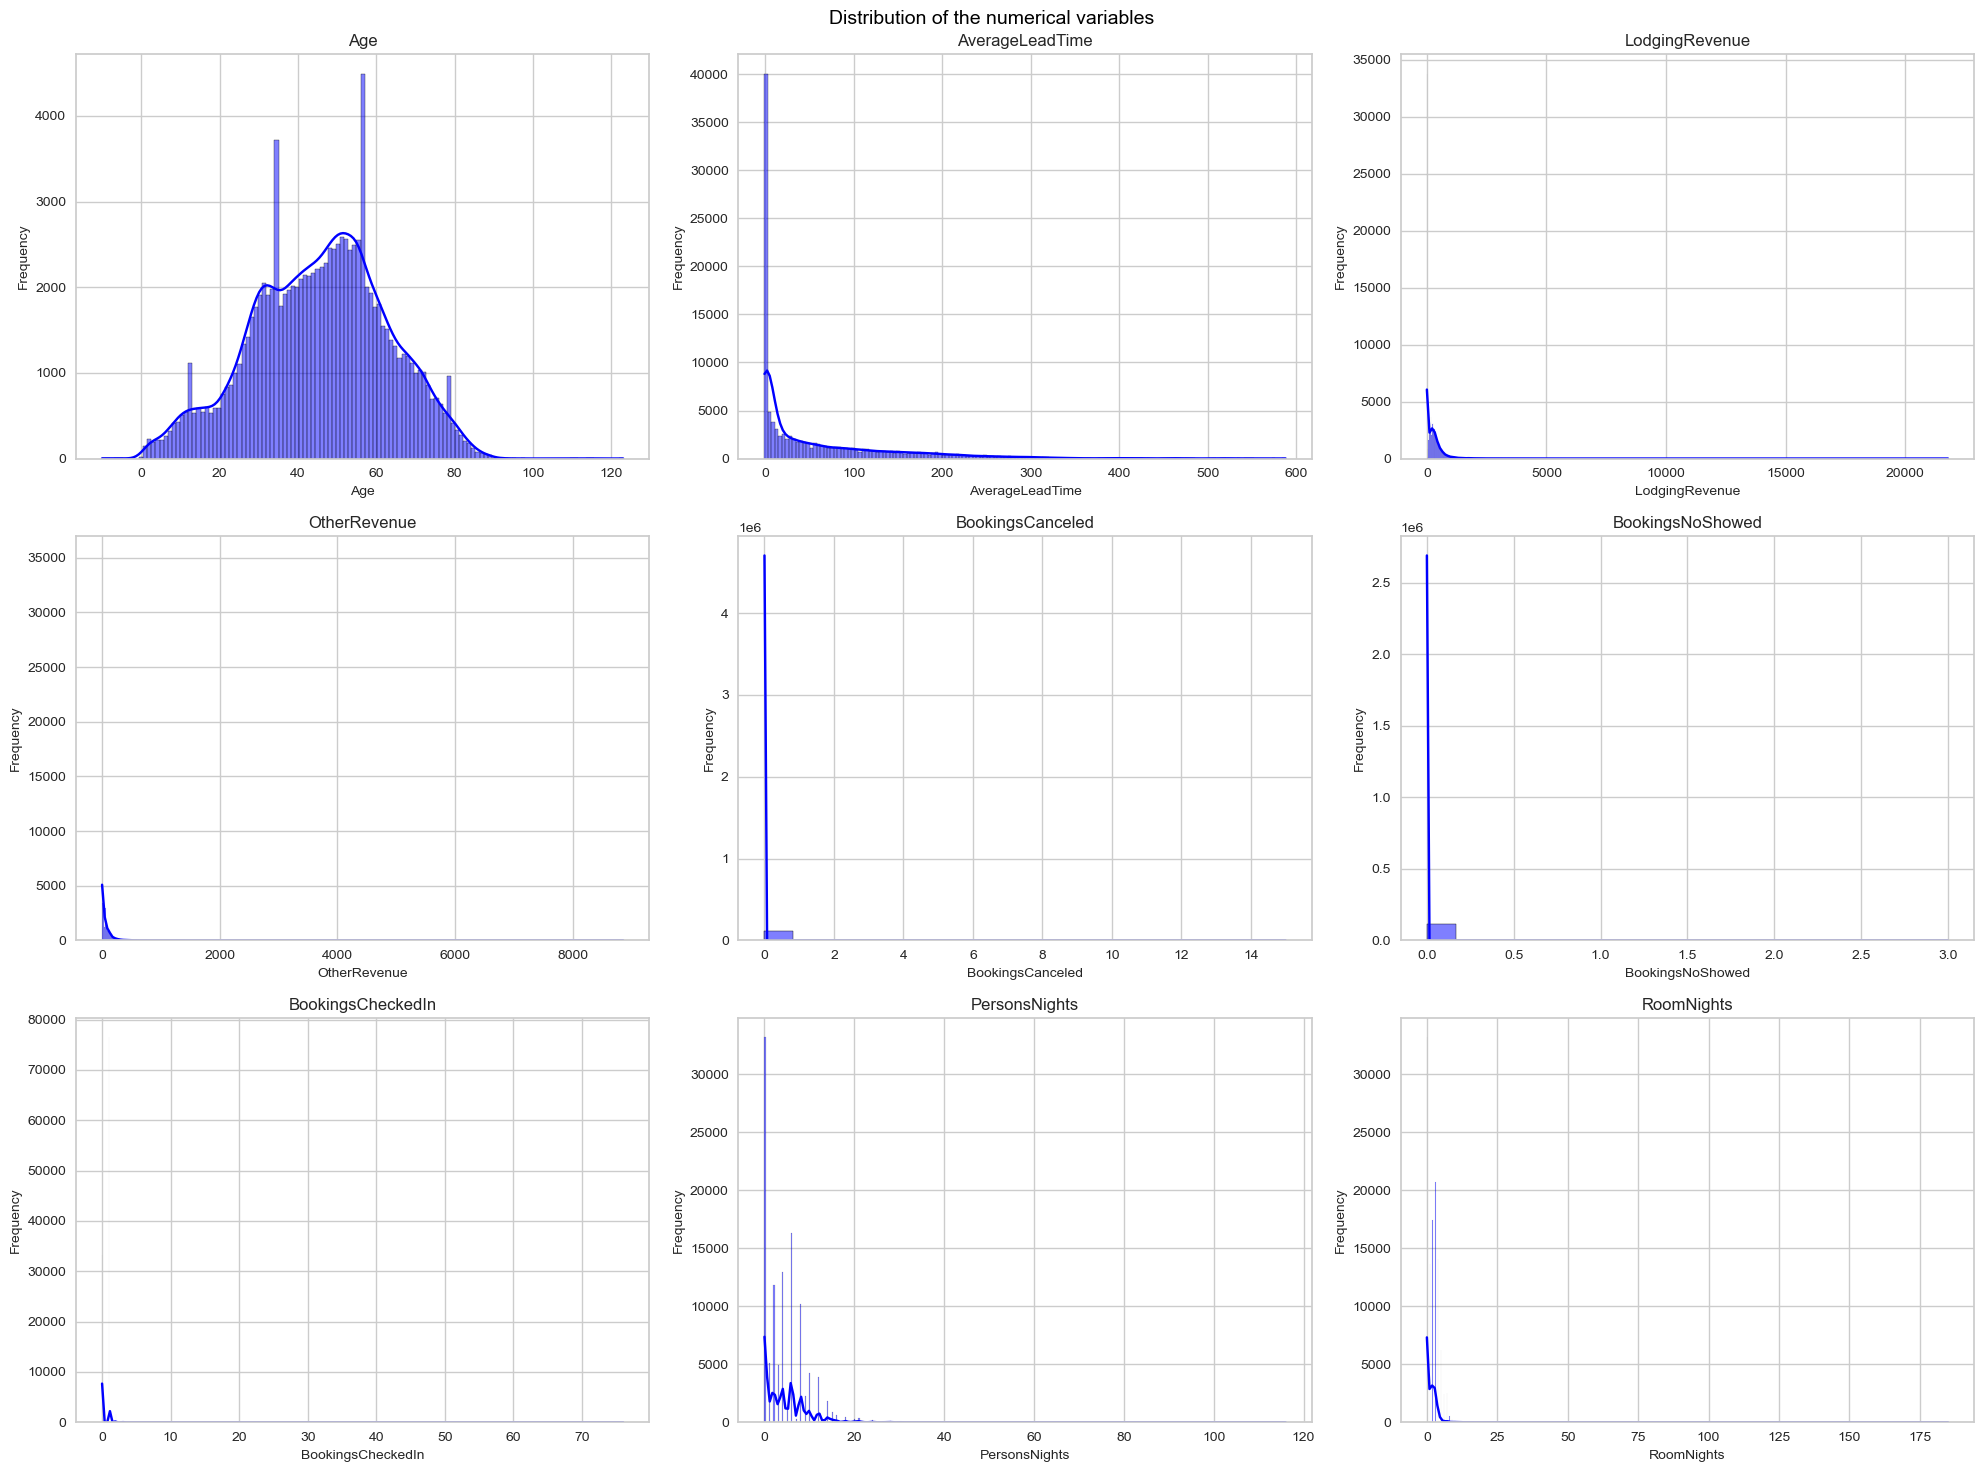

In [121]:
#PLOT THE DISTRIBUTION OF THE NUMERICAL VARIABLES
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle('Distribution of the numerical variables', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
for i, column in enumerate(df_numerical.columns):
    sns.histplot(df_numerical[column], kde=True, ax=axes[i//3, i%3], color='blue')
    axes[i//3, i%3].set_title(column, fontsize=subPlots_Title_fontSize)
    axes[i//3, i%3].set_xlabel(column, fontsize=subPlots_xAxis_fontSize)
    axes[i//3, i%3].set_ylabel('Frequency', fontsize=subPlots_yAxis_fontSize)
plt.tight_layout()
plt.show()


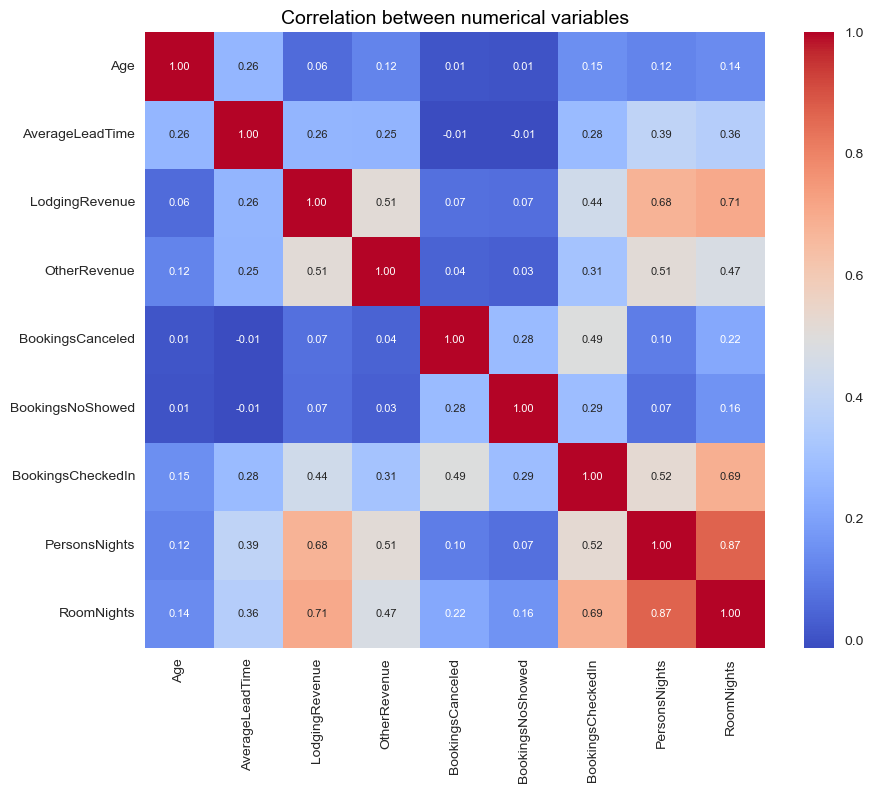

In [122]:
#SEE IF THERE ARE CORRELATIONS BETWEEN THE VARIABLES
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": heatmaps_text_fontSize})
plt.title('Correlation between numerical variables', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
plt.show()


PERSON NIGHTS AND ROOM NIGHTS ARE HIGHLY CORRELATED, BOOKINGS CHECKED IN AND ROOM NIGHTS SOMEWHAT CORRELATED AS WELL

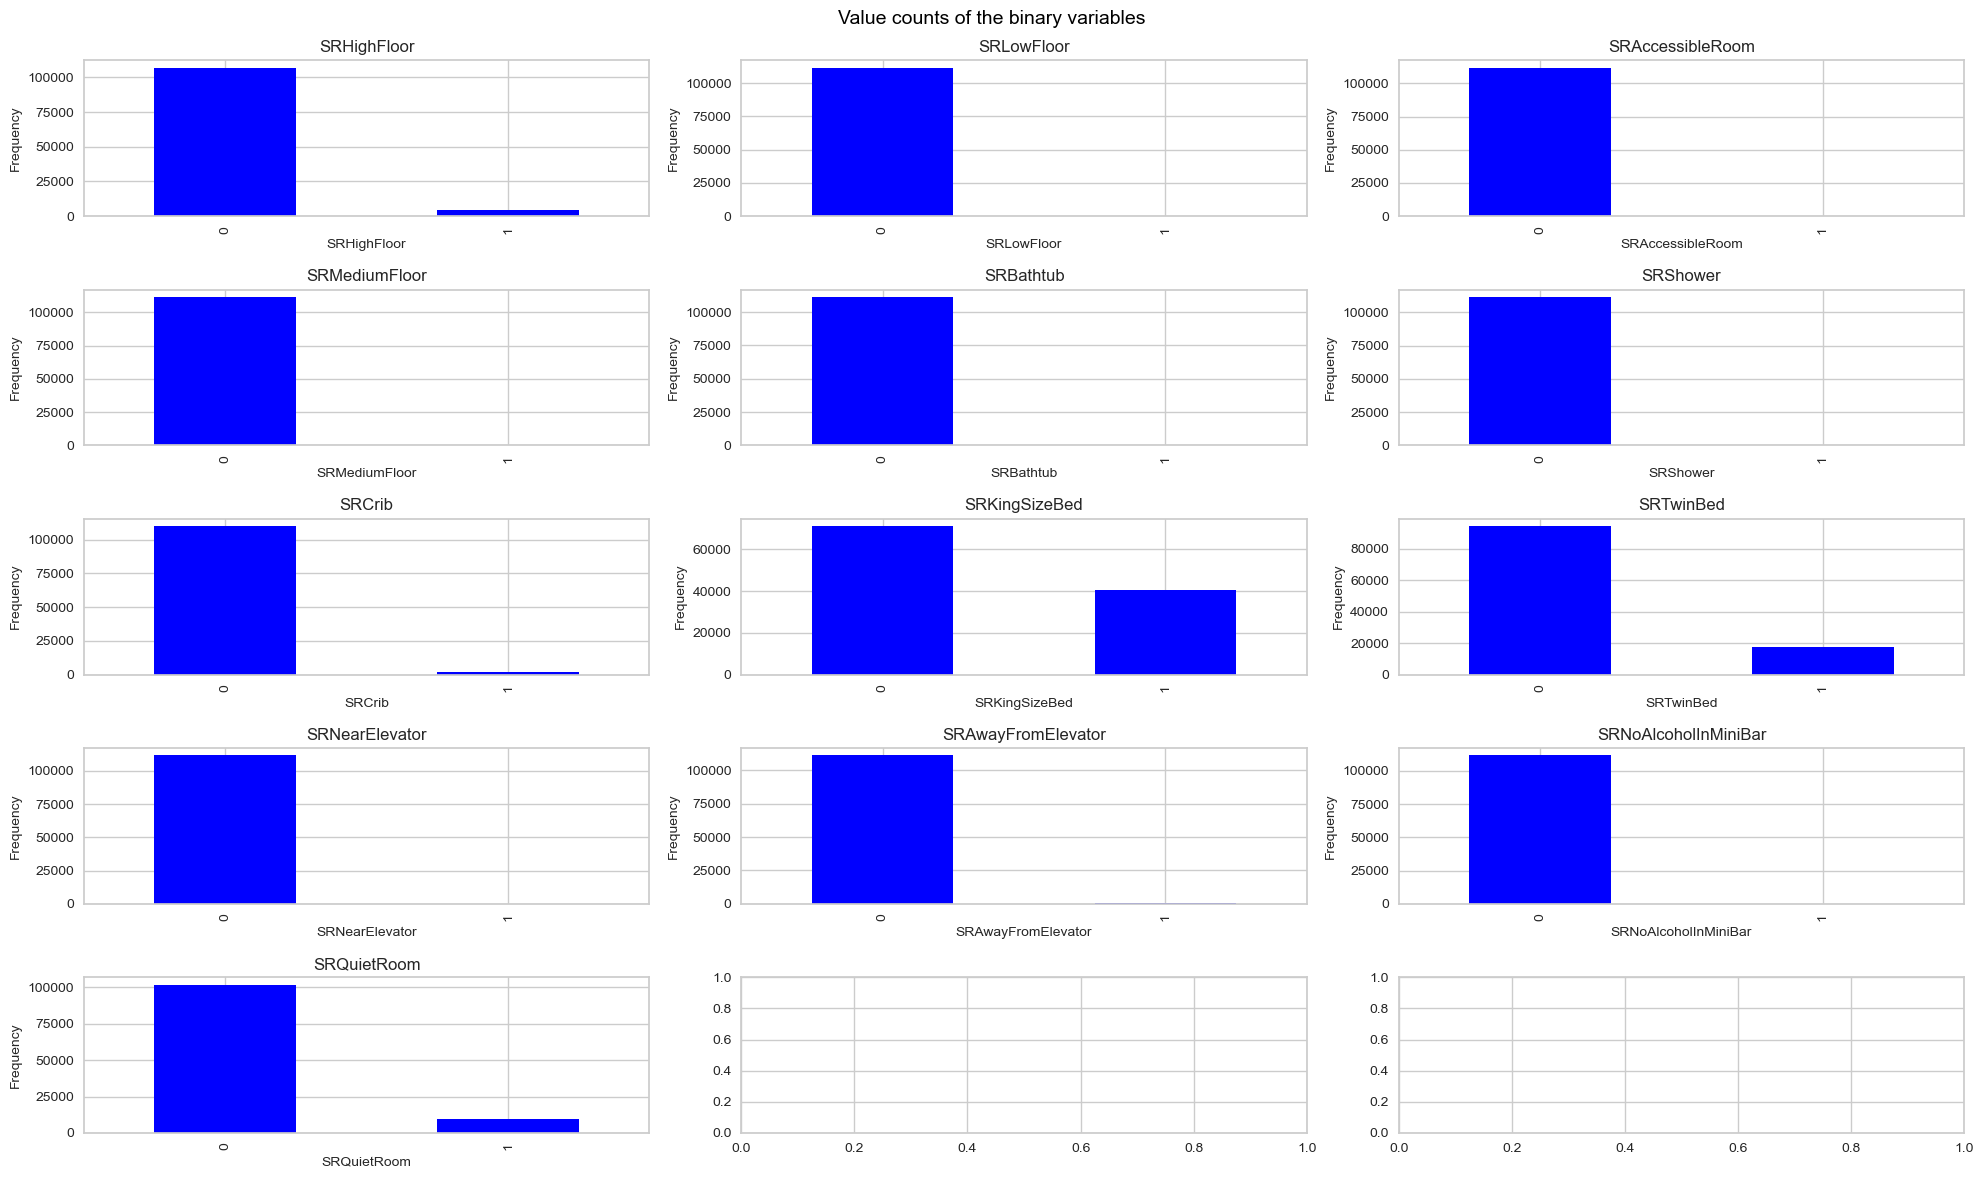

In [123]:
#PLOT THE VALUE COUNTS OF THE BINARY VARIABLES
fig, axes = plt.subplots(nrows=ceil(len(df_binary.columns)/3), ncols=3, figsize=(20, 12))
fig.suptitle('Value counts of the binary variables', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
for i, column in enumerate(df_binary.columns):
    if i < len(df_binary.columns):
        df_binary[column].value_counts().plot(kind='bar', ax=axes[i//3, i%3], color='blue')
        axes[i//3, i%3].set_title(column, fontsize=subPlots_Title_fontSize)
        axes[i//3, i%3].set_xlabel(column, fontsize=subPlots_xAxis_fontSize)
        axes[i//3, i%3].set_ylabel('Frequency', fontsize=subPlots_yAxis_fontSize)
        axes[i//3, i%3].tick_params(axis='x', labelsize=subPlots_label_fontSize)
plt.tight_layout()
plt.show()





MOST OF THE BINARY VARIABLES ARE HIGLY IMBALLANCED, WE NEED TO ADRESS THIS ISSUE
ONLY KING SIZE BED AND TWIN SIZE BED SEEM TO HAVE A AMOUNT OF 1'S


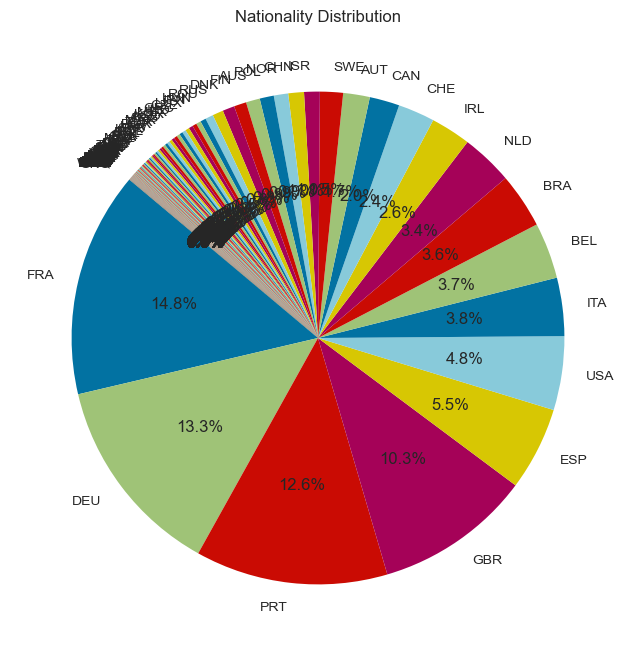

In [124]:
#PLOT THE VARIABLE NATIONALITY
#GENERATED BY CHATGPT
# Assuming df_grouped_copy and continent_percentages are already defined
df_copy = df.copy()

# Calculate continent percentages
nationality_percentages = df_copy['Nationality'].value_counts(normalize=True)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(nationality_percentages, labels=nationality_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Nationality Distribution')

# Display the plot
plt.show()

THERE ARE A LOT OF NATIONALITIES (199), WE NEED TO GROUP THEM SOMEHOW (USING THE ISO CODE)

In [125]:
#SEE THE NUMBER OF DIFFERENT NATIONALITIES
df['Nationality'].nunique()

199

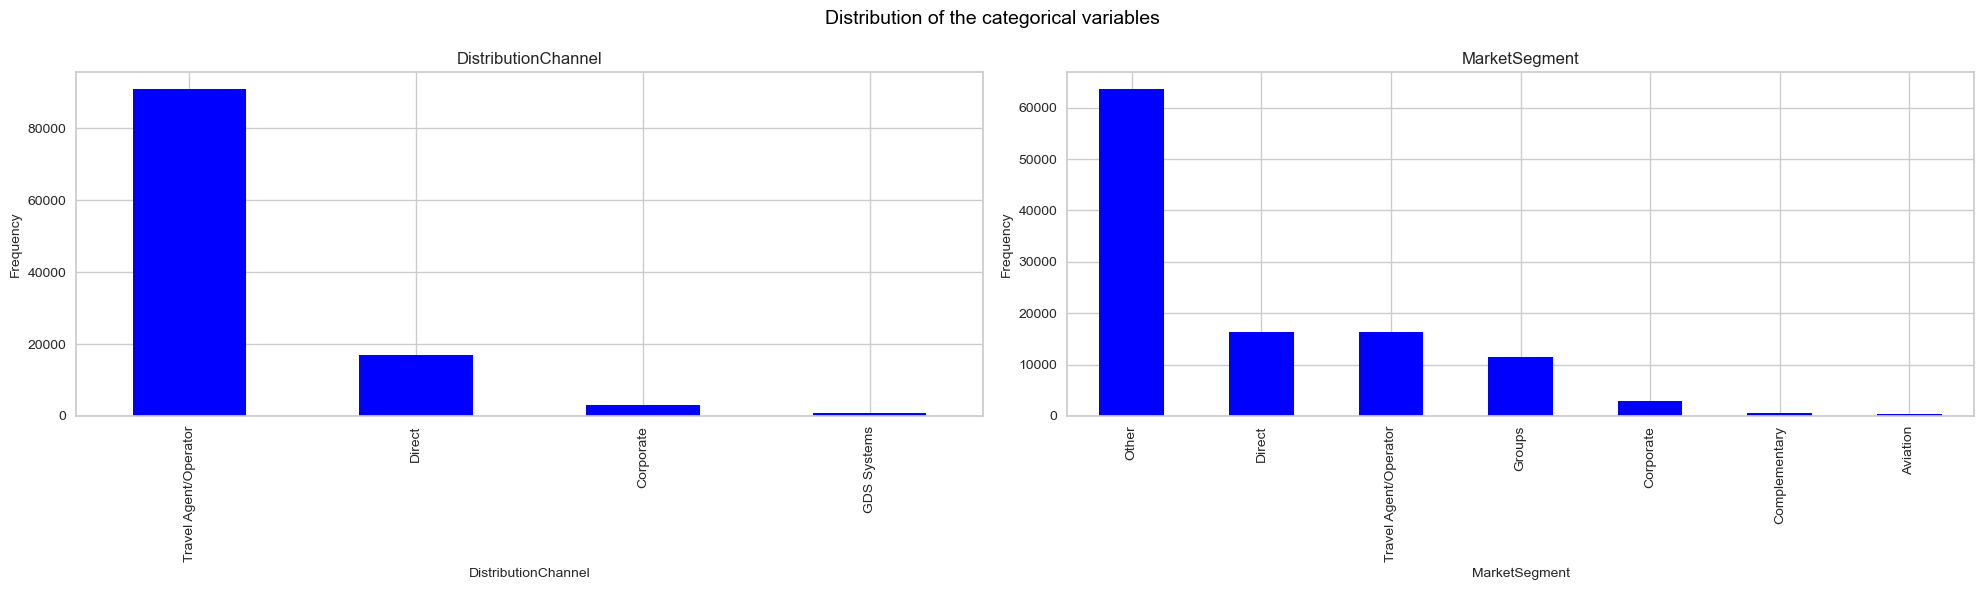

In [126]:
#PLOT THE DISTRIBUITION OF THE CATEGORICAL VARIABLES
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
fig.suptitle('Distribution of the categorical variables', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
for i, column in enumerate(df_categorical.columns):
    df_categorical[column].value_counts().plot(kind='bar', ax=axes[i], color='blue')
    axes[i].set_title(column, fontsize=subPlots_Title_fontSize)
    axes[i].set_xlabel(column, fontsize=subPlots_xAxis_fontSize)
    axes[i].set_ylabel('Frequency', fontsize=subPlots_yAxis_fontSize)
    axes[i].tick_params(axis='x', labelsize=subPlots_label_fontSize)
plt.tight_layout()
plt.show()


MOST OF THE CUSTOMERS USE THE TRAVEL AGENT DISTRIBUITION CHANNEL, A SMALL PORTION USES DIRECT, AND ALMOST NONE USE THE OTHERS
THE MARKET SEGMENT ISN'T TOO IMPORTANT AS WE'RE TRYING TO RECLASSIFY EACH CUSTOMER ON THEIR NEW MARKET SEGMENT ON A DATA BASED APROACH 

<hr>
<a class="anchor" id="datapreparation">
    
# 3. Data Preparation
    
    
</a>

In [127]:
#Make a copy of the dataframe called X
X = df.copy()

<a class="anchor" id="inconsistencies">
    
## 3.1. Identifying Inconsistencies
    
    
</a>

In [128]:
#WE ARE GOING TO DROP PEOPLE WITH 0 CHECK INS. THEY WILL BE TREATED AS THEIR OWN SEGMENT OF CUSTOMERS
X = X[X['BookingsCheckedIn'] != 0]

#SEE AMOUNT OF ROWS LOST
df.shape[0] - X.shape[0]


33198

THESE CLIENTS ARE PROBABLY PEOPLE WHO WANTED TO MAKE A RESERVATION ON THE HOTEL BUT DIDNT ACTUALLY FINISH THE PROCESS. THE HOTEL CAN ONLY CONFIRM THE CUSTOMERS CREDENTIALS AFTER THE CUSTOMER HAS CHECKED IN ONCE, SO FOR THE PURPOSE OF OUR ANALYSIS AND MARKET SEGMENTATION THESE SHOULDN'T BE INCLUDED.

In [129]:
#PEOPLE WITH NEGATIVE AGES
X[X['Age'] < 0]

#CHANGE THESE VALUES TO NAN AS WE DONT HAVE A WAY TO KNOW THE REAL AGE
X['Age'] = X['Age'].apply(lambda x: np.nan if x < 0 else x)


In [130]:
#PEOPLE WITH NEGATIVE AVERAGE LEAD TIME
X[X['AverageLeadTime'] < 0]

#CHANGE THESE VALUES TO NAN AS WE DONT HAVE A WAY TO KNOW THE REAL AVERAGE LEAD TIME
X['AverageLeadTime'] = X['AverageLeadTime'].apply(lambda x: np.nan if x < 0 else x)


In [131]:
#ON THE CONTEXT OF OUR ANALYSIS WE CAN'T TARGET UNDERAGED PEOPLE SO WE ARE GOING TO DROP THEM
X = X[(X['Age'] >= 18) | X['Age'].isna()]

In [132]:
#CHECK NEW DISTRIBUTION OF AGE AND THE MEAN
X['Age'].describe()

count    74443.000000
mean        48.540387
std         14.709766
min         18.000000
25%         37.000000
50%         48.000000
75%         59.000000
max        115.000000
Name: Age, dtype: float64

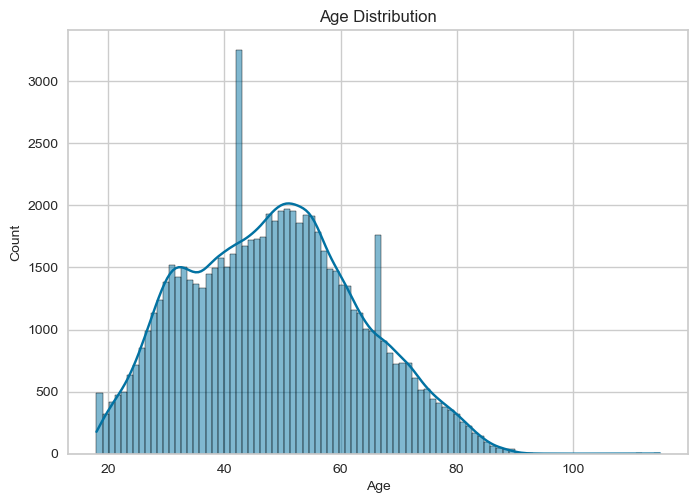

In [133]:
#CHECK NEW DISTRIBUTION OF AGE
sns.histplot(X['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

WE CAN TELL THAT MOST OF THE CUSTOMERS ARE MIDDLE AGED (MEAN 48.54 YEARS), THERE ARE CERTAINLY SOME OUTLIERS (HAVING A PERSON WITH 115 YEARS)

In [134]:
#PEOPLE WHO HAVE MORE CHECK INS THAN PERSONS NIGHTS, WHICH ISN'T POSSIBLE
X = X[X['BookingsCheckedIn'] <= X['PersonsNights']]

In [135]:
# SAME FOR ROOM NIGHTS
X = X[X['BookingsCheckedIn'] <= X['RoomNights']]

In [136]:
#CHECK FOR DUPLICATES IN DOCIDHASH
X['DocIDHash'].value_counts()

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    2899
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B      31
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52      24
0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003      14
0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076      14
                                                                      ... 
0x6E07CC88AAA6AB8D8A946F3EFB97BFF3519DC932812B391C0A6155E4D7D56228       1
0xD3840A0ECB462C8B03F8EC1E0B4FC58ADBAAE3CDB877488A844D4C7FA6D1A16E       1
0x91E56432F07A4038AE3F85106C89B3616EBCBC2684B053D651F4ED510F8211C6       1
0x5F4F1EB40A146AA441B6FFFA8D500BA523CC61C639750E837E6F7DCCBB9290C2       1
0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795CE7C50F4CEB0294A589F0       1
Name: count, Length: 71476, dtype: int64

In [137]:
#CHECK FOR DUPLICATES IN NAMEHASH
X['NameHash'].value_counts()

NameHash
0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A960AD7D9A7FB4EC61D02F    21
0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D8787F8C7A413529295FD50    15
0x5D6D35B2A085C783FB5EAA6088C9C97EE3596F2FB552E3F86410B2B9B91A0350    13
0xCC6A9BE603D312DEFDFD886218FB1FE35EC93C47F6C755CAFD68308CEAD6610B    11
0x62C1813853A215A922F2EA86CF88C56F184CBC672F38701DC73605FD47B917D5    10
                                                                      ..
0xD4899CDB823B94B8D1FF6B87E314E74648B40BFB46ECEC6C9D69164225379F11     1
0xE88E478339AF6BA21CB2BCD6256E88C07616E20799C30EC043F04FB7CFBD1C99     1
0xBB3EF155501772F193BDD51B53AB3C9C700B4C9DF6DE7F965259AE38649DD83F     1
0xAF8F618248529FFA9C800E001615135AC494A4AEA97FD6CE06F4E155C31A36F0     1
0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B771047F6BF891FD565DA5C44C     1
Name: count, Length: 74474, dtype: int64

THERE ARE PLENTY OF DUPLICATES IN NAMEHASH AND DOCIDHASH, WE NEED TO MAKE SURE THAT THEY ARE THE SAME PERSON OR A DIFFERENT ONE. TO DO THIS WE ARE GOING TO MERGE THREE DIFFERENT VARIABLES INTO ONE:
-NAMEHASH 
-DOCIDHASH
-NACIONALITY

In [138]:
#CREATE VARIABLE MERGING THE NAMEHASH DOCIDHASH AND NATIONALITY TO SEE INDIVIDUAL CUSTOMERS
X['CustomerHash'] = X['NameHash'] + X['DocIDHash'] + X['Nationality']

#CHECK THE NEW VARIABLE
X['CustomerHash'].value_counts()

CustomerHash
0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A960AD7D9A7FB4EC61D02F0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922BPRT    20
0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D8787F8C7A413529295FD500x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52PRT    15
0x5D6D35B2A085C783FB5EAA6088C9C97EE3596F2FB552E3F86410B2B9B91A03500x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003CHE    13
0x3F7AC57386BCF3165796D2B67A548552CA0B7D387E744A36A6A446D2E09D1FBD0x6B421376B94F3D1722979458A96DF486DEA0F9290CC05E9699F2762FD0DDA71DDNK    10
0xCD38FE774A83198829377D15E818F31ED0A00E9320801B25585ABD784E08A18F0x8FA8EB6D044E4F2C691C2091FAB27B92FEFE22122F419975703C3D5BA76AC4A2AUT    10
                                                                                                                                           ..
0x0AAF4A74F3BA524C2B0EA31939E640739BCC280FD712767288862E73846D81440x86136DF5886E07616E9B8A6BFE7CCF06521CDEAEF0555AFA4DD41DDB65642F9FPOL

In [139]:
len(X)

77489

AFTER THIS MERGE WE ARE NOW SURE THAT IN FACT IT IS THE SAME PERSON THAT HAS GONE TO THE HOTEL MULTIPLE TIMES, SO WE JUST NEED TO FIND A WAY TO MERGE ALL OF THEIR ROWS TOGETHER INTO A SINGLE ENTRY LATER

<a class="anchor" id="inconsistencies">
    
## 3.2. Duplicates
    
    
</a>

In [140]:
#GROUP BY THE CUSTOMERHASH BASED ON THE CONDITIONS: THESE VARIABLES SHOULD BE THE SUM OF VALUES
    #LodgingRevenue	OtherRevenue	BookingsCanceled	BookingsNoShowed	BookingsCheckedIn	
#THESE VARIABLES SHOULD BE THE MEAN OF VALUES
    #AVERAGEMEANTIME AND ROOMNIGHTS
#THESE VARIABLES SHOULD BE THE MOST RECENT VALUES BASED ON THE VARIABLE DAYSSINCECREATION
    #Age, Nationality, dayssincecreation, distributionchannel, srhighfloor, srlowfloor, sraccessibleroom, srmediumfloor, srbathtub, srshower, srcrib, srkingsizebed, srtwinbed, srnearelevator, srawayfromelevator, srnoalcoholinminibar, srquietroom

X_grouped = X.groupby('CustomerHash').agg({
    'Age': 'last',
    'Nationality': 'last',
    'DaysSinceCreation': 'last',
    'DistributionChannel': 'last',
    'LodgingRevenue': 'sum',
    'OtherRevenue': 'sum',
    'BookingsCanceled': 'sum',
    'BookingsNoShowed': 'sum',
    'BookingsCheckedIn': 'sum',
    'AverageLeadTime': 'mean',
    'PersonsNights': 'sum',
    'RoomNights': 'sum',
    'SRHighFloor': 'last',
    'SRLowFloor': 'last',
    'SRAccessibleRoom': 'last',
    'SRMediumFloor': 'last',
    'SRBathtub': 'last',
    'SRShower': 'last',
    'SRCrib': 'last',
    'SRKingSizeBed': 'last',
    'SRTwinBed': 'last',
    'SRNearElevator': 'last',
    'SRAwayFromElevator': 'last',
    'SRNoAlcoholInMiniBar': 'last',
    'SRQuietRoom': 'last'
})

#RESET INDEX
X_grouped.reset_index(inplace=True)


THIS GROUP BY IS JUSTIFIED BY THE FACT THAT MOST OF THE PEOPLES REFFERENCES ARE BASED ON THEIR LATEST CHOICES (IF THE PERSON THE LAST TIME THEY CAME TO THE HOTEL ASKED FOR A KINGSIZED BED THEY ARE PROBABLY GONNA ASK FOR IT FROM NOW ON)

In [141]:
X_grouped['CustomerHash'].value_counts()

CustomerHash
0x000093906C9FA7A54C937EF1848D4AA5F79F104D8365CAB6499528F6E784B9730xFBB48E8A898A0973E8FC147D2AC89307B16EE4D6B618ED1D49ECF90673FFCB90BRA    1
0xAA4C52410C2A3235F1160C81198A65B62971C7AB1EA0BB001305B7FCBD1D948B0x5223BF0A6D2B9A7E1F862108E2EE2C2B5986FDC14B37AF54DC837A4104070FD3AUT    1
0xAA5C051C8EB6EE75349DEF9EB7DBCE0C482CD5D39C57635E98A9F650A3FBF1260x6EB04DF9882D1E13CD130164BF2CA36BB45C666E2ADD61C0FABC7486637E3DAFBRA    1
0xAA5B42726A8E5F49CD2E5FAFAE79A57BAAFC52E3DABF29589DDA1682354F88000x22B4D2A4A339867B9D3D8D1259F99544CD760FEB6E6ABAB3EADDB71E7F649C3CFRA    1
0xAA5B30B80C597B3C392E1D4DDEF9EC9B9D39F6F039316CE1F7E00B4D4FEBA0910xDCBD3D8C3E0770FED843207E6C11855F6AEB58AF5661B0216ABD98E5E9B61AD6GBR    1
                                                                                                                                          ..
0x553CB6E5854470B0A1F7F96C32171C408FA9AE44DC1D5480D4F2DA8790E0FA190xEDD83B55B6ECA32B595D88FFDF15653207C63BCD77D6501B59D622FF015485FFHUN    1


In [142]:
len(X_grouped)

75102

WE LOST AROUND 2000 ROWS, WHICH MEANS THAT THERE WERE A LOST OF CUSTOMERS WITH MOER THAN ONE ENTRY 

<a class="anchor" id="mv">
    
## 3.3. Missing Values
    
    
</a>

In [143]:
X_grouped.isnull().sum()

CustomerHash               0
Age                     2837
Nationality                0
DaysSinceCreation          0
DistributionChannel        0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
AverageLeadTime           13
PersonsNights              0
RoomNights                 0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

THERE ARE PLENTY OF NAN'S IN THE VARIABLE AGE, AND SOME THAT WE CERATED BEFORE ON THE VARIABLE AVERAGE LEAD TIME. WE WILL USE THE KNN IMPUTER ON THE NUMERIC VARIABLES TO GET VALUES FROM RECORDS THAT ARE ALIKE THE ONES THAT HAVE THE NANS

In [144]:
#CREATE X_NUM WHICH HAS ONLY THE NUMERICAL VARIABLES
X_num = X_grouped[['Age','AverageLeadTime','LodgingRevenue','OtherRevenue','BookingsCanceled','BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights']]

#APPLY THE KNN IMPUTER TO THE X_NUM DATAFRAME ON THE VARIABLE AGE
imputer = KNNImputer(n_neighbors=5)
X_num_imputed = imputer.fit_transform(X_num)
X_num_imputed = pd.DataFrame(X_num_imputed, columns = X_num.columns)

In [145]:
#APPLY THE THE CHANGES TO THE X_GROUPED DATAFRAME
# Reset the indices of both dataframes
X_grouped.reset_index(drop=True, inplace=True)
X_num_imputed.reset_index(drop=True, inplace=True)
X_grouped[X_num_imputed.columns] = X_num_imputed

In [146]:
#SEE THE NANS
X_grouped.isnull().sum()

CustomerHash            0
Age                     0
Nationality             0
DaysSinceCreation       0
DistributionChannel     0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
AverageLeadTime         0
PersonsNights           0
RoomNights              0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

<a class="anchor" id="outlier">
    
## 3.4. Dealing with Outliers
    
    
</a>

<a class="anchor" id="graph">
    
### 3.4.1. Visualization of Outliers
    
    
</a>

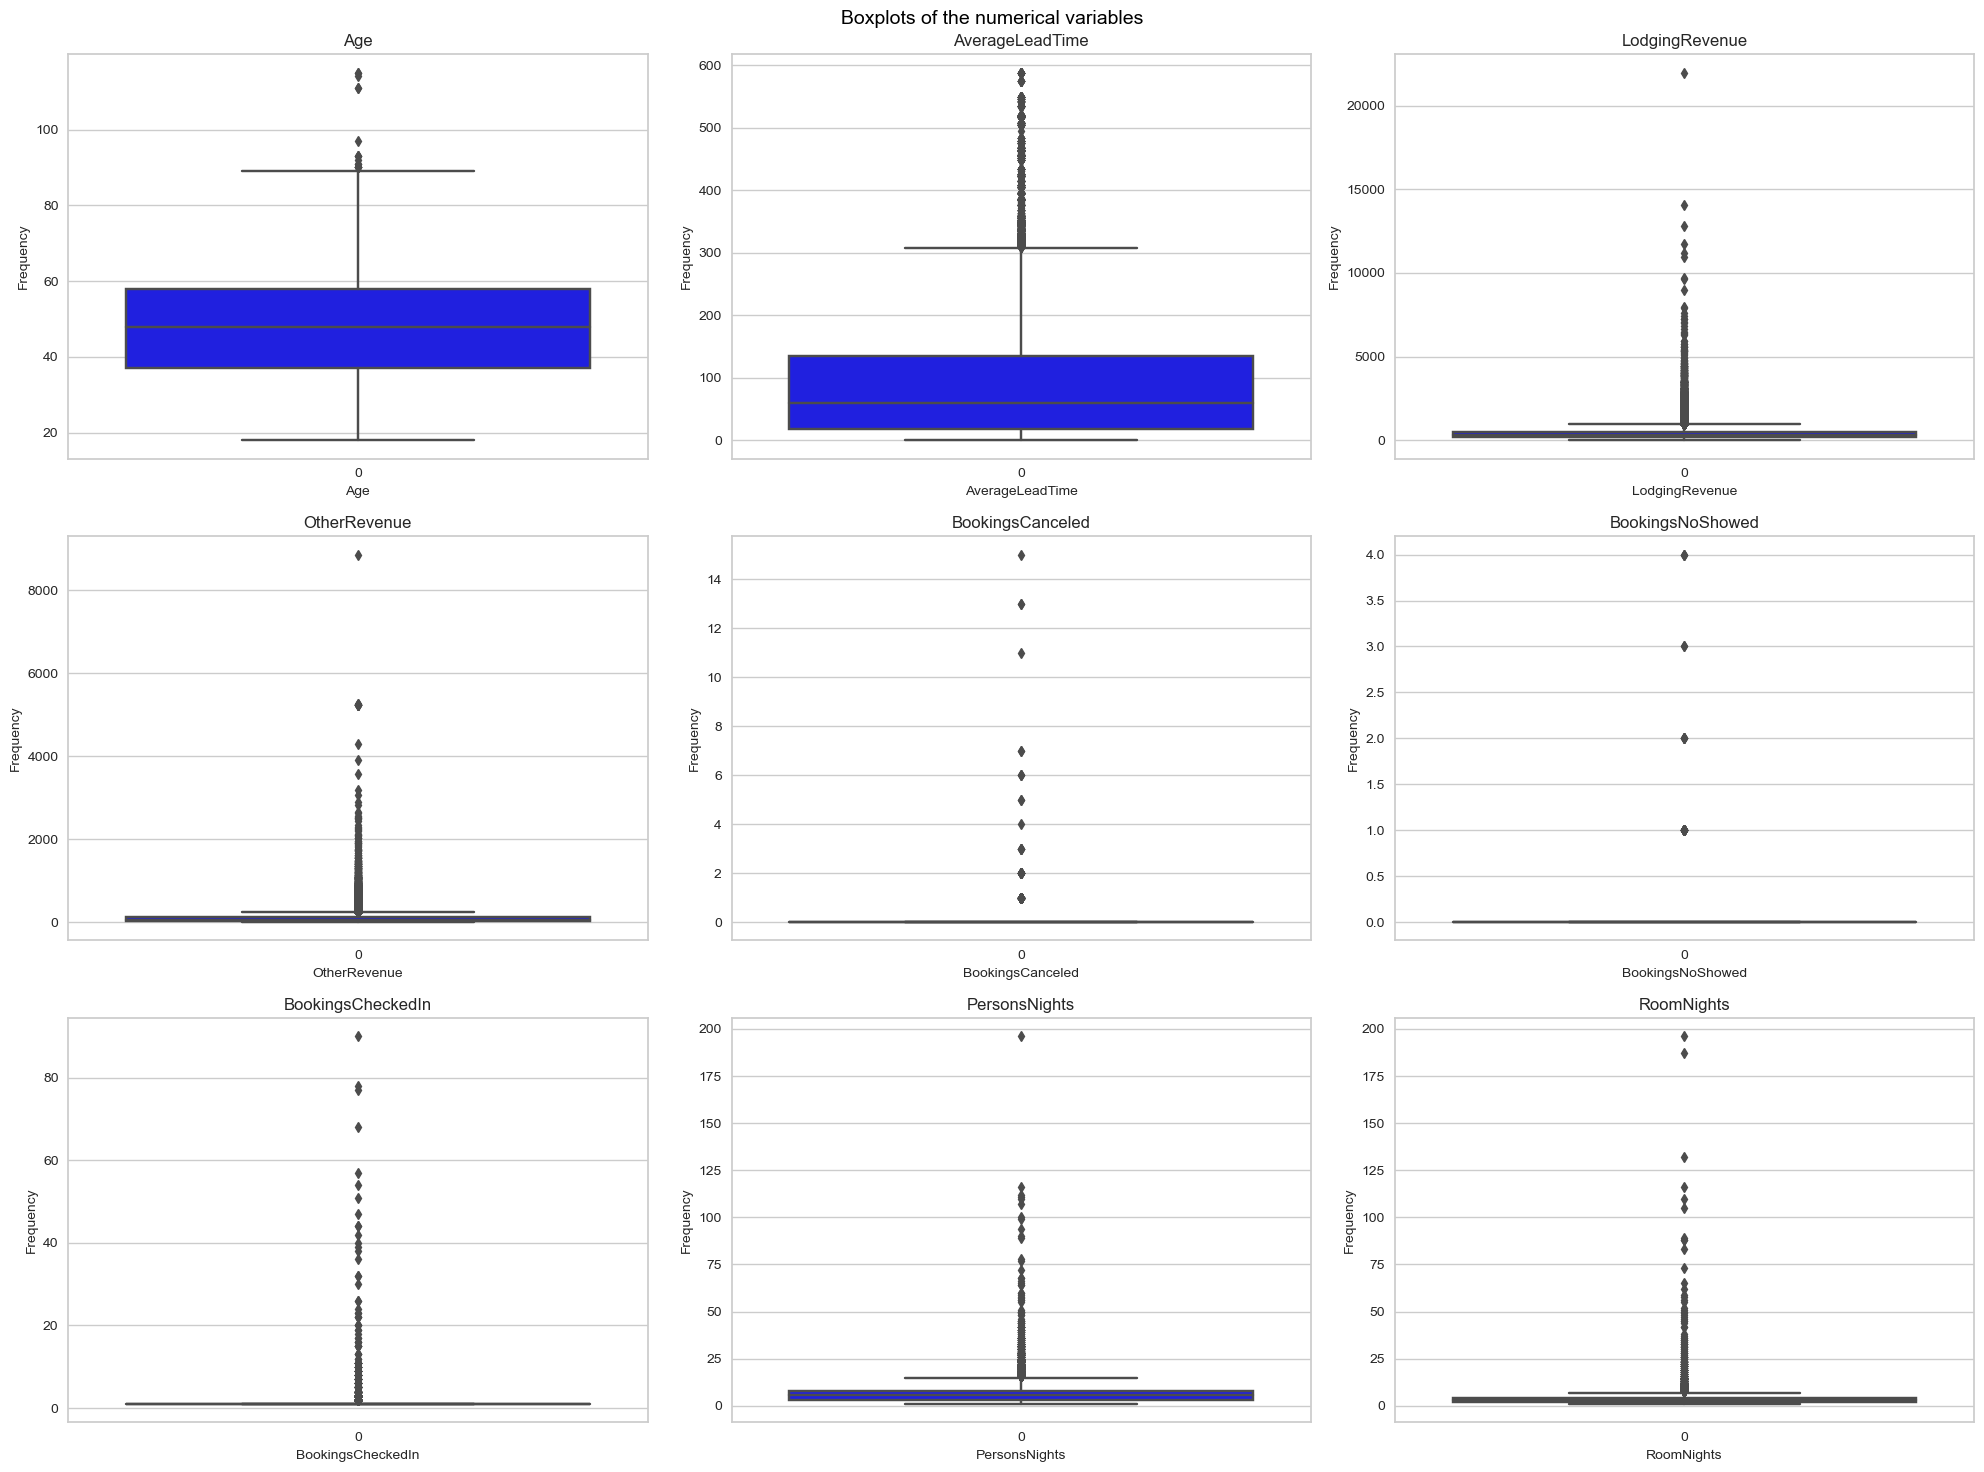

In [147]:
#MAKE BOX PLOTS TO SEE OUTLIERSOF THE NUMERICAL VARIABLES
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle('Boxplots of the numerical variables', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
for i, column in enumerate(X_num_imputed.columns):
    sns.boxplot(X_num_imputed[column], ax=axes[i//3, i%3], color='blue')
    axes[i//3, i%3].set_title(column, fontsize=subPlots_Title_fontSize)
    axes[i//3, i%3].set_xlabel(column, fontsize=subPlots_xAxis_fontSize)
    axes[i//3, i%3].set_ylabel('Frequency', fontsize=subPlots_yAxis_fontSize)
plt.tight_layout()
plt.show()


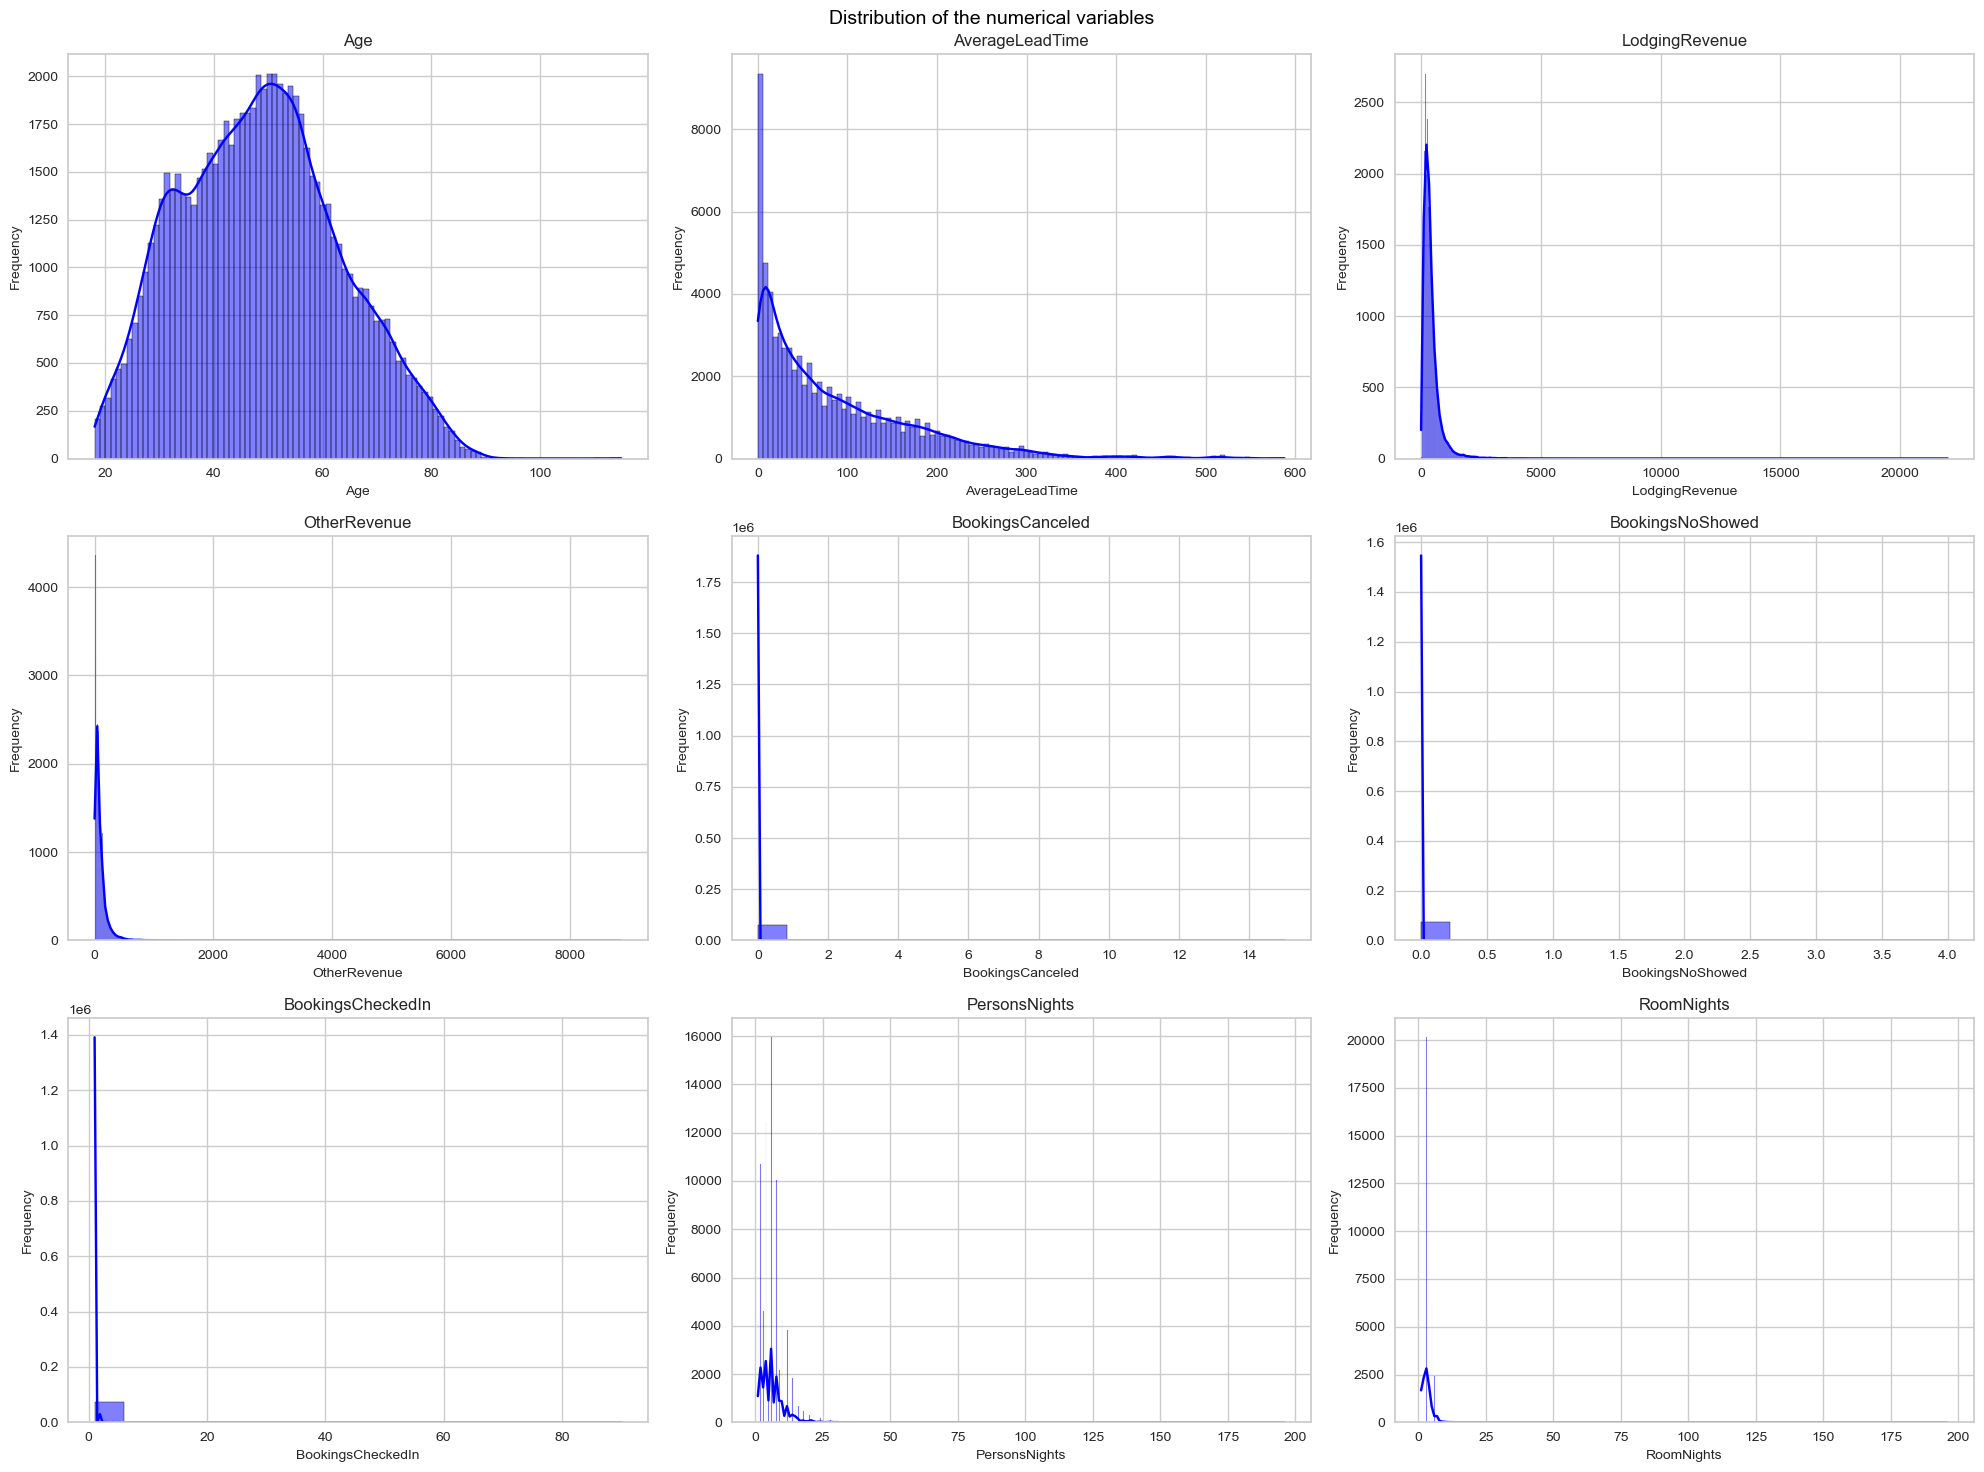

In [148]:
#MAKE A HISTOGRAM TO SEE THE DISTRIBUTION OF THE NUMERICAL VARIABLES
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle('Distribution of the numerical variables', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
for i, column in enumerate(X_num_imputed.columns):
    sns.histplot(X_num_imputed[column], kde=True, ax=axes[i//3, i%3], color='blue')
    axes[i//3, i%3].set_title(column, fontsize=subPlots_Title_fontSize)
    axes[i//3, i%3].set_xlabel(column, fontsize=subPlots_xAxis_fontSize)
    axes[i//3, i%3].set_ylabel('Frequency', fontsize=subPlots_yAxis_fontSize)
plt.tight_layout()
plt.show()



<a class="anchor" id="manualfilter">

### 3.4.2. Manual Filter

</a>

In [149]:
#MAKE A COPY OF THE DATAFRAME
X_grouped_outliers1 = X_grouped.copy()

In [150]:
#MAKE FILTERS TO APPLY TO THE DF
filter = (
    (X_grouped_outliers1['Age'] <= 95) &
    (X_grouped_outliers1['AverageLeadTime'] <= 550) &
    (X_grouped_outliers1['LodgingRevenue'] <= 12500) &
    (X_grouped_outliers1['OtherRevenue'] <= 4000) &
    (X_grouped_outliers1['BookingsCanceled'] <= 8) &
    (X_grouped_outliers1['BookingsNoShowed'] <= 4) &
    (X_grouped_outliers1['BookingsCheckedIn'] <= 8) &
    (X_grouped_outliers1['PersonsNights'] <= 20) &
    (X_grouped_outliers1['RoomNights'] <= 10)
)

#APPLY THE FILTER
X_grouped_outliers1 = X_grouped_outliers1[filter]

In [151]:
#SEE PERCENTAGE OF ROWS KEPT
X_grouped_outliers1.shape[0] / X_grouped.shape[0]



0.9829032515778541

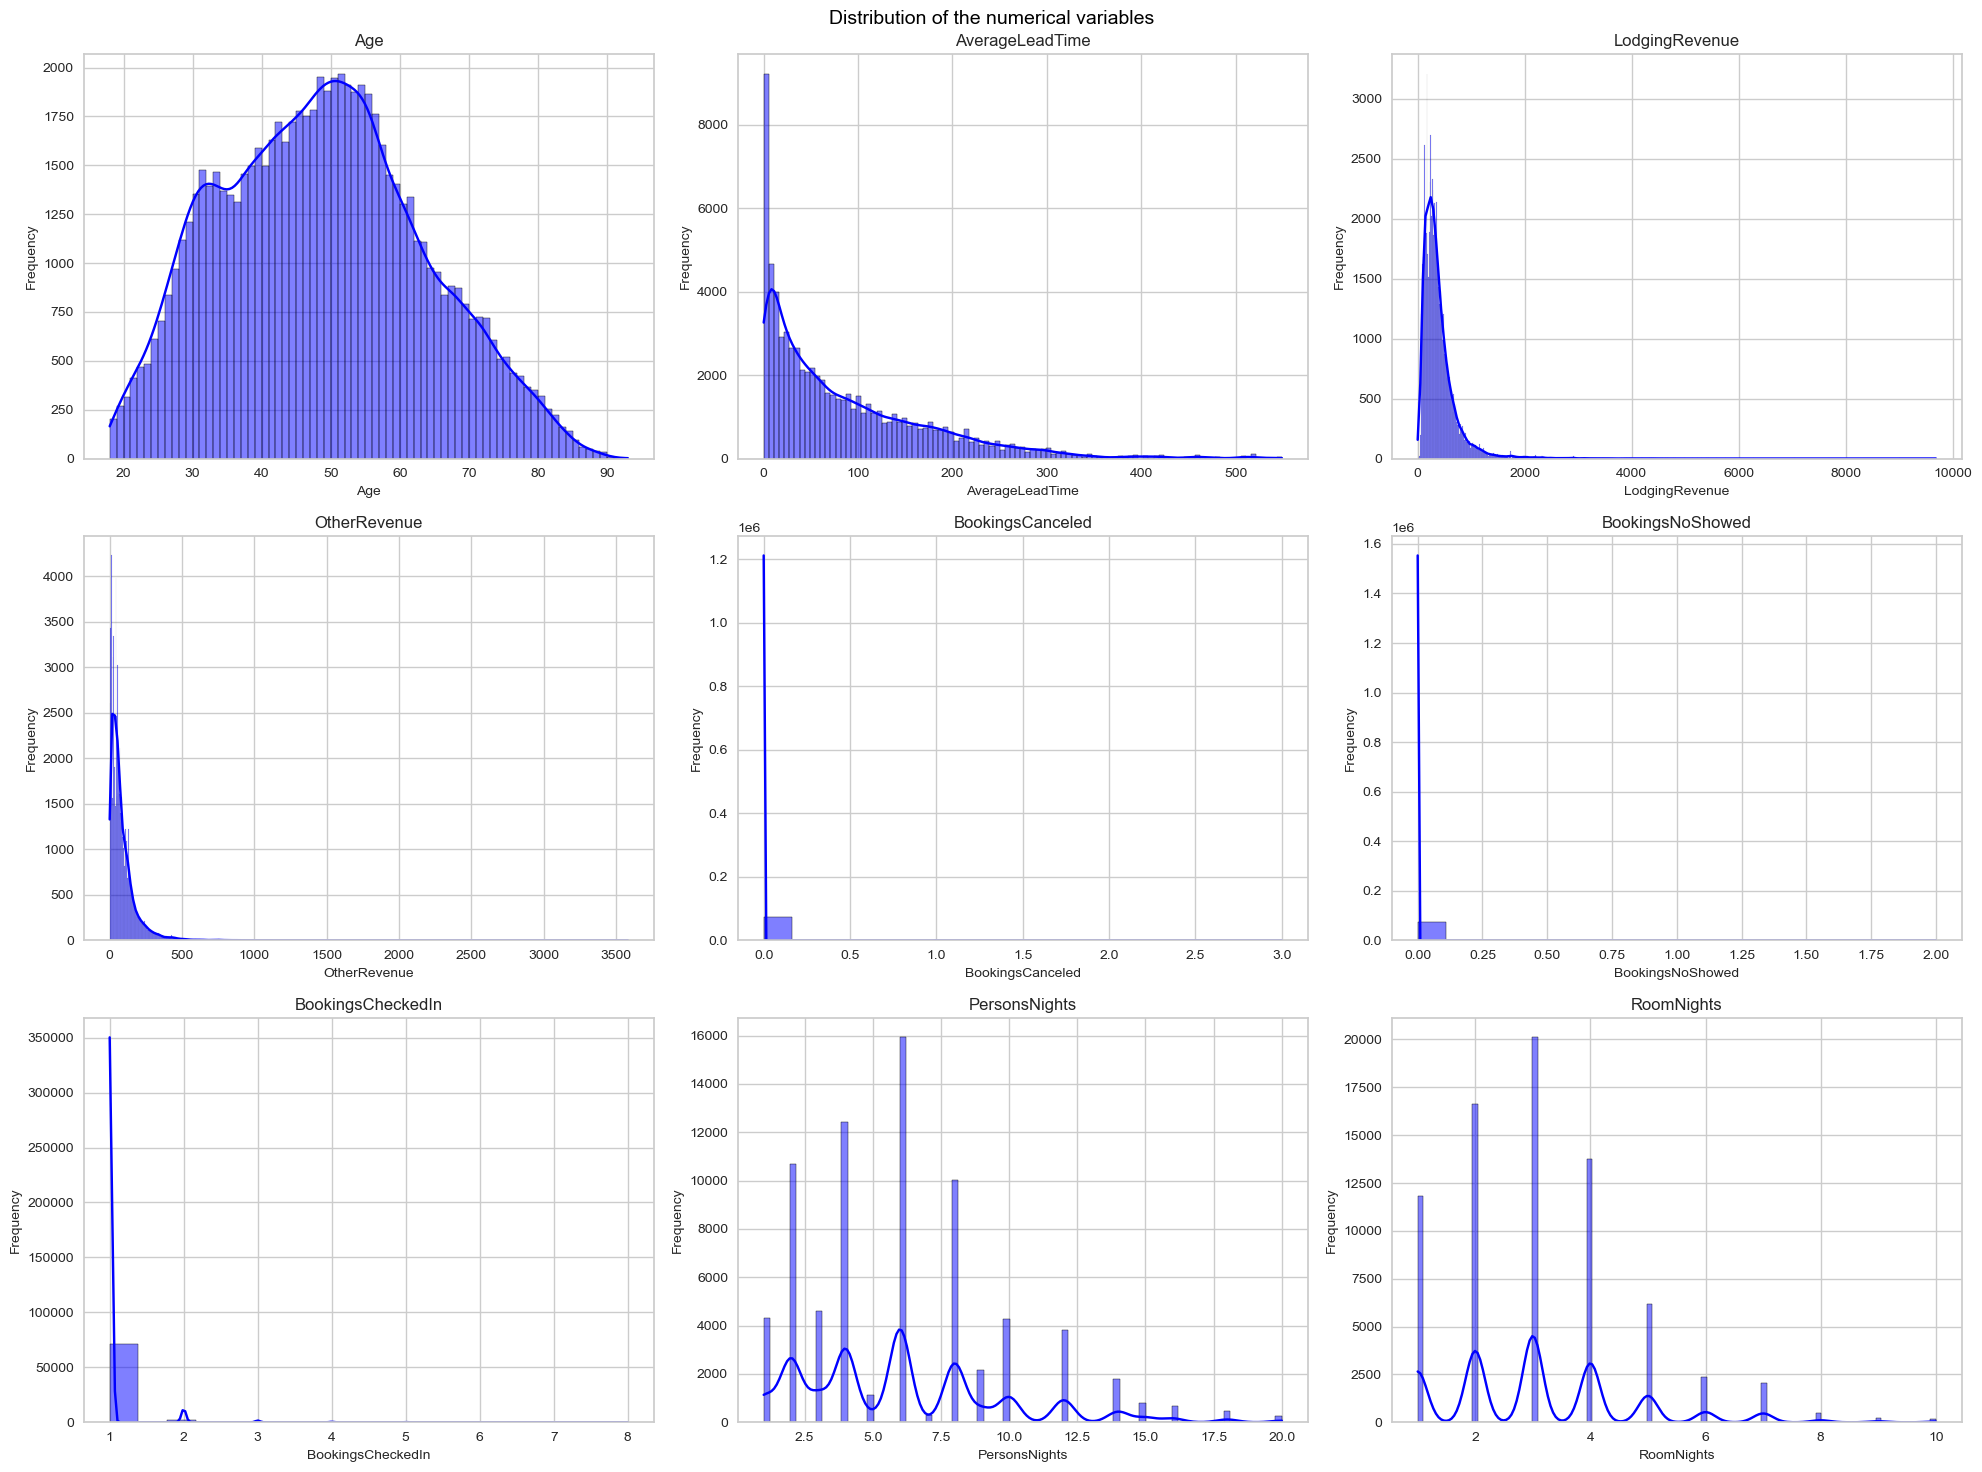

In [152]:
#PLOT THE DISTRIBUTION OF THE NUMERICAL VARIABLES AFTER MANUAL FILTERING
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle('Distribution of the numerical variables', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
for i, column in enumerate(X_grouped_outliers1[numerical_cols].columns[:]):
    sns.histplot(X_grouped_outliers1[column], kde=True, ax=axes[i//3, i%3], color='blue')
    axes[i//3, i%3].set_title(column, fontsize=subPlots_Title_fontSize)
    axes[i//3, i%3].set_xlabel(column, fontsize=subPlots_xAxis_fontSize)
    axes[i//3, i%3].set_ylabel('Frequency', fontsize=subPlots_yAxis_fontSize)
plt.tight_layout()
plt.show()


<a class="anchor" id="zscorefilter">

#### 3.4.2. Z-Score Filter

</a>

In [153]:
#MAKE A COPY OF THE DATAFRAME
X_grouped_outliers2 = X_grouped[numerical_cols].copy()

In [154]:
#APPLY THE Z-SCORE TO THE NUMERICAL VARIABLES
z = np.abs(stats.zscore(X_grouped_outliers2))
X_grouped_outliers2 = X_grouped_outliers2[(z < 3).all(axis=1)]

#SEE PERCENTAGE OF ROWS KEPT
X_grouped_outliers2.shape[0] / X_grouped.shape[0]


0.946086655481878

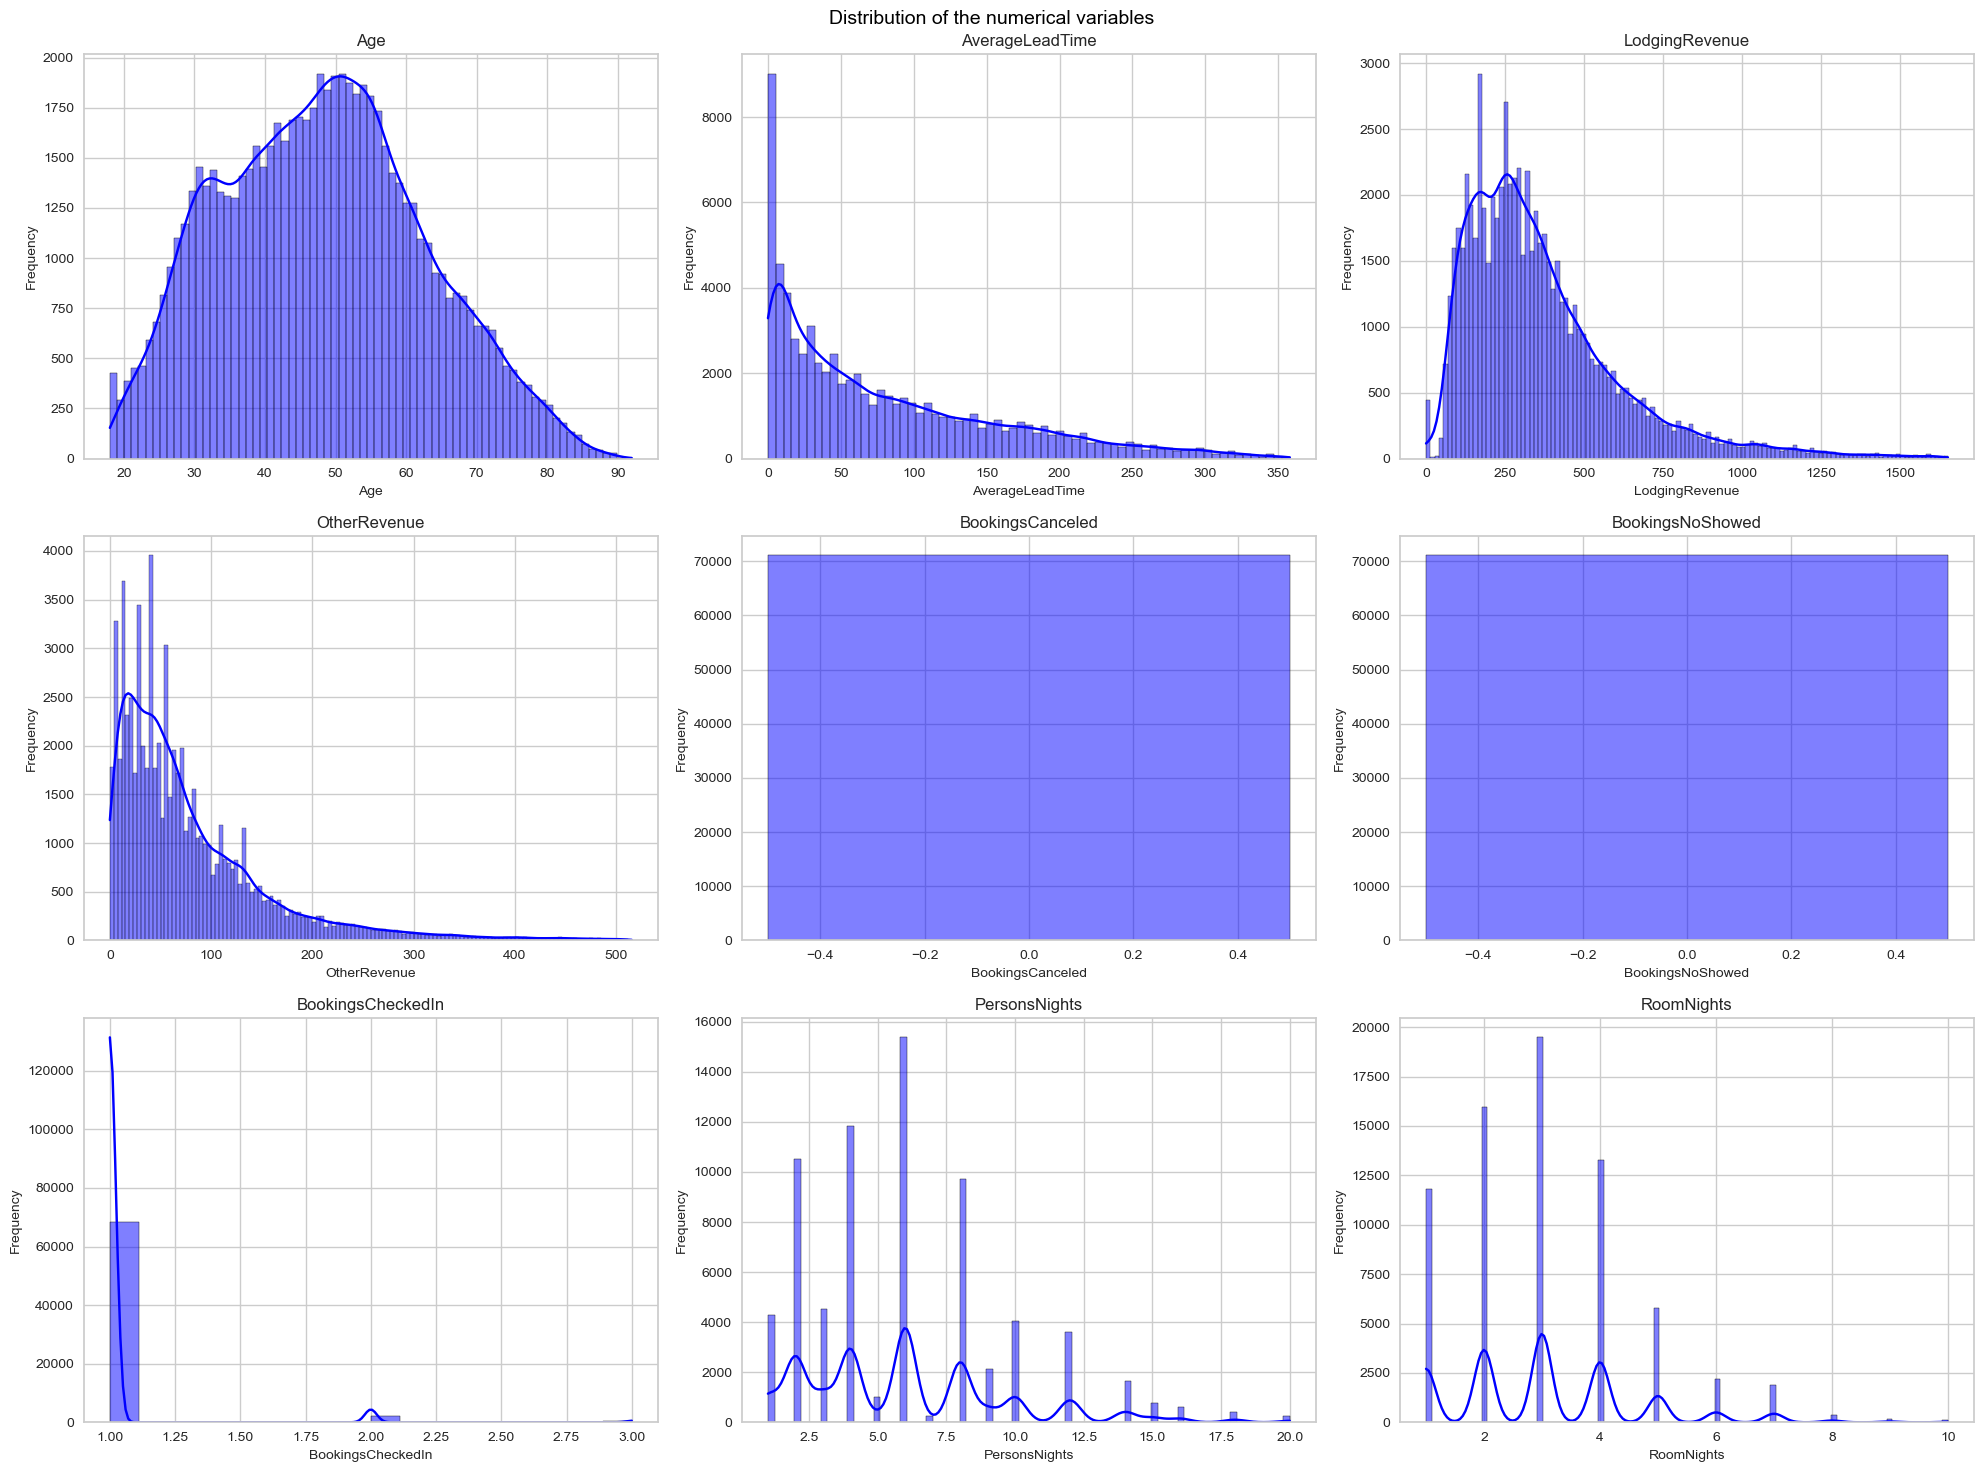

In [155]:
#PLOT THE DISTRIBUTION OF THE NUMERICAL VARIABLES AFTER Z-SCORE
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle('Distribution of the numerical variables', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
for i, column in enumerate(X_grouped_outliers2[numerical_cols].columns[:]):
    sns.histplot(X_grouped_outliers2[column], kde=True, ax=axes[i//3, i%3], color='blue')
    axes[i//3, i%3].set_title(column, fontsize=subPlots_Title_fontSize)
    axes[i//3, i%3].set_xlabel(column, fontsize=subPlots_xAxis_fontSize)
    axes[i//3, i%3].set_ylabel('Frequency', fontsize=subPlots_yAxis_fontSize)
plt.tight_layout()
plt.show()


LOSES ABOUT 6% OF DATA WHICH IS A BIT MORE THAN WANTED, ALSO BOOKINGS CANCELLED AND BOOKINGS NOSHOWED ARE WEIRD NOW

<a class="anchor" id="iqrfilter">

#### 3.4.3. IQR Filter

</a>

In [156]:
#MAKE A COPY OF THE DATAFRAME
X_grouped_outliers3 = X_grouped[numerical_cols].copy()


In [157]:
#APPLY THE IQR TO THE NUMERICAL VARIABLES
Q1 = X_grouped_outliers3.quantile(0.25)
Q3 = X_grouped_outliers3.quantile(0.75)
IQR = Q3 - Q1
X_grouped_outliers3 = X_grouped_outliers3[~((X_grouped_outliers3 < (Q1 - 1.5 * IQR)) | (X_grouped_outliers3 > (Q3 + 1.5 * IQR))).any(axis=1)]

#SEE PERCENTAGE OF ROWS KEPT
X_grouped_outliers3.shape[0] / X_grouped.shape[0]


0.8284200154456606

LOSES TOO MUCH DATA (ABOUT 18%)

<a class="anchor" id="zscoremanual">

#### 3.4.4. Combining Z-score and Manual Filtering

</a>

In [158]:
#CREATE A COPY OF THE DATAFRAME
X_grouped_outliers4 = X_grouped[numerical_cols].copy()

In [159]:
#COMBINE THE Z-SCORE AND THE MANUAL FILTER 
X_grouped_outliers4 = X_grouped_outliers4[filter]
z = np.abs(stats.zscore(X_grouped_outliers4[numerical_cols]))
X_grouped_outliers4 = X_grouped_outliers4[(z < 3).all(axis=1)]

#SEE PERCENTAGE OF ROWS KEPT
X_grouped_outliers4.shape[0] / X_grouped.shape[0]


0.8921466805145003

<a class="anchor" id="iqrmanual">

#### 3.4.5. Combining IQR and Manual Filtering

</a>

In [160]:
#CREATE A COPY OF THE DATAFRAME
X_grouped_outliers5 = X_grouped[numerical_cols].copy()

In [161]:
#COMBINE THE IQR AND THE MANUAL FILTER
X_grouped_outliers5 = X_grouped_outliers5[filter]
Q1 = X_grouped_outliers5.quantile(0.25)
Q3 = X_grouped_outliers5.quantile(0.75)
IQR = Q3 - Q1
X_grouped_outliers5 = X_grouped_outliers5[~((X_grouped_outliers5 < (Q1 - 1.5 * IQR)) | (X_grouped_outliers5 > (Q3 + 1.5 * IQR))).any(axis=1)]

#SEE PERCENTAGE OF ROWS KEPT
X_grouped_outliers5.shape[0] / X_grouped.shape[0]


0.8218289792548801

BOTH OF THE COMBINED FILTERS LOSE TOO MUCH DATA. SO WE SHOULD USE EITHER THE Z-SCORE ONLY OR THE MANUAL FILTERING.
AFTER GOING THROUGH ALL OF THE METHODS BASED ON THE PERCENTAGE OF DATA KEPT AND THE VISUALIZATION OF THE DISTRIBUITION ON THE BEST METHODS, WE CHOSE TO GO WITH THE MANUAL FILTERING APPROACH.

<a class="anchor" id="fe">
    
## 3.5. Feature Engineering
    
    
</a>

In [162]:
#CREATE A COPY OF THE DATAFRAME FOR FEATURE ENGINEERING
X_fe = X_grouped_outliers1.copy()

In [163]:
#CREATE VARIABLE REVENUE PER NIGHT
X_fe['RevenuePerRoomNights'] = X_fe['LodgingRevenue'] + X_fe['OtherRevenue'] / X_fe['RoomNights']

In [164]:
#SEE THE DESCRIPRION OF THE VARIABLE
X_fe['RevenuePerRoomNights'].describe()

count    73818.000000
mean       423.253846
std        359.090227
min          0.000000
25%        220.616667
50%        337.025000
75%        510.594643
max      10118.660000
Name: RevenuePerRoomNights, dtype: float64

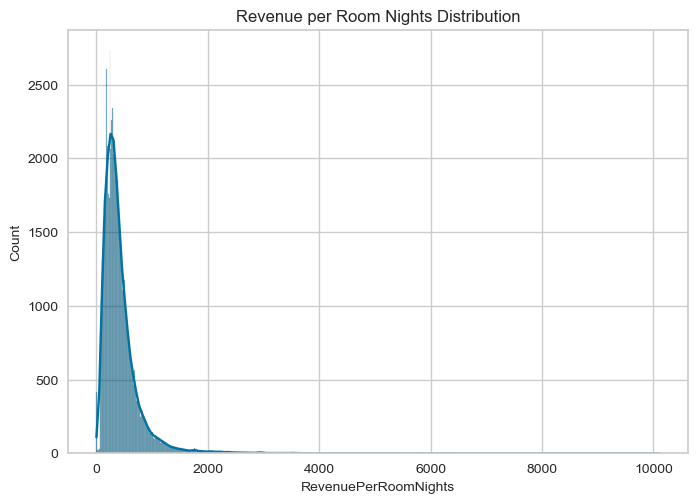

In [165]:
#plot the distribution of the variable
sns.histplot(X_fe['RevenuePerRoomNights'], kde=True)
plt.title('Revenue per Room Nights Distribution')
plt.show()


In [166]:
#CREATE VARIABLE CONTINENT TO GROUP THE DIFFERENT NATIONALITIES, KEEPING THE MOST COMMON NATIONALITIES
#GENERATED WITH CHATGPT
excluded_countries = {'FRA', 'DEU', 'PRT', 'GBR'}

def get_continent(alpha3_code):
    try:
        if alpha3_code in excluded_countries:
            return alpha3_code
        country = pc.country_alpha3_to_country_alpha2(alpha3_code)
        continent_code = pc.country_alpha2_to_continent_code(country)
        if continent_code == 'EU':
            return 'RestOfEurope'
        return 'RestOfTheWorld'
    except KeyError:
        return 'RestOfTheWorld'

X_grouped['Continent'] = X_grouped['Nationality'].apply(lambda x: get_continent(x))

In [167]:
X_grouped['Continent'].value_counts()

Continent
RestOfEurope      23976
RestOfTheWorld    11959
FRA               11106
DEU               10164
PRT               10115
GBR                7782
Name: count, dtype: int64

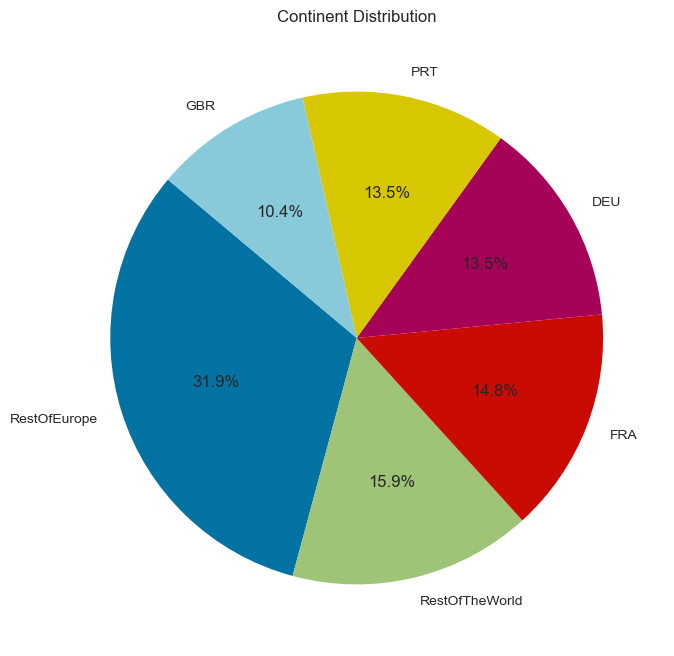

In [168]:
#SEE THE DISTRIBUITION WITH A PIE CHART
plt.figure(figsize=(8, 8))
plt.pie(X_grouped['Continent'].value_counts(), labels=X_grouped['Continent'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Continent Distribution')
plt.show()

We opted for this segmentation, as in Portugal most of our customers are from western europe. We and because of the distribuition of the countries we found it was best to sepperate the rest of the countries with two categories:
1. Europe - Which represents the rest of the countries from europe that didn't have at least 10% representation
2. RestOfTheWorld - Which represents all the remaining countries outside of europe

In [169]:
#CREATE VARIABLE CANCELATION OR NO SHOW RATE
X_fe['CancelationOrNoShowRate'] = (X_fe['BookingsCanceled'] + X_fe['BookingsNoShowed']) / X_fe['BookingsCheckedIn']

#SEE THE DESCRIPTION OF THE VARIABLE    
X_fe['CancelationOrNoShowRate'].describe()


count    73818.000000
mean         0.000860
std          0.026981
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: CancelationOrNoShowRate, dtype: float64

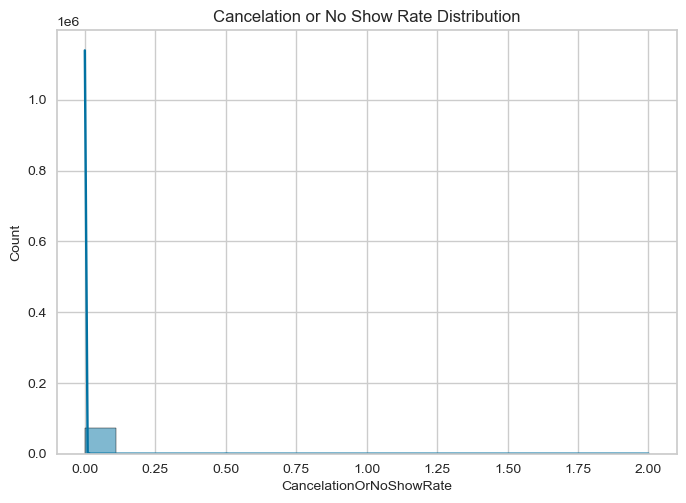

In [170]:
#PLOT THE DISTRIBUTION OF THE VARIABLE
sns.histplot(X_fe['CancelationOrNoShowRate'], kde=True)
plt.title('Cancelation or No Show Rate Distribution')
plt.show()




THERE ARENT MANY PEOPLE WITH CANCELATIONS OR NOSHOWS, SO WE'RE NOT SURE OF THE IMPACT OF THIS VARIABLE

#

In [171]:
#MAKE FEATURE TOTALSR
X_fe['TotalSR'] = X_fe[['SRHighFloor','SRLowFloor','SRAccessibleRoom','SRMediumFloor','SRBathtub','SRShower','SRCrib','SRKingSizeBed','SRTwinBed','SRNearElevator','SRAwayFromElevator','SRNoAlcoholInMiniBar','SRQuietRoom']].sum(axis=1)

#SEE THE DESCRIPTION OF THE VARIABLE
X_fe['TotalSR'].describe()

count    73818.000000
mean         0.649273
std          0.682215
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: TotalSR, dtype: float64

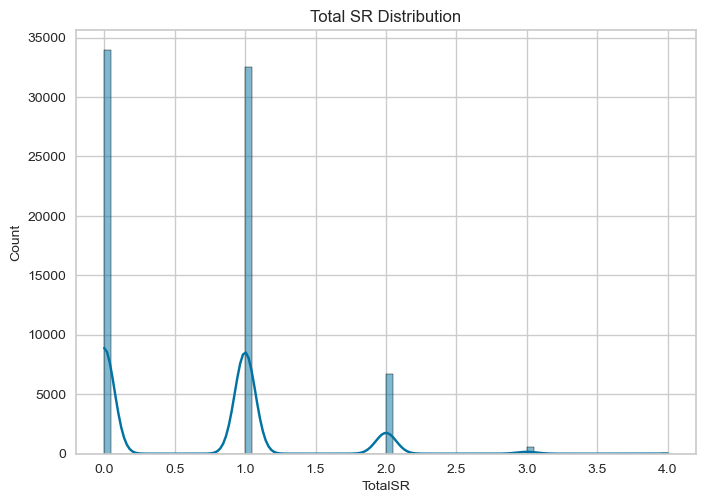

In [172]:
#PLOT THE DISTRIBUTION OF THE VARIABLE
sns.histplot(X_fe['TotalSR'], kde=True)
plt.title('Total SR Distribution')
plt.show()


<a class="anchor" id="gcd">
    
## 3.6. General Customer Description
    
    
</a>

In [173]:
#MAKE A PROFILLING OF THE DATAFRAME
#profile = ProfileReport(X_fe, title='Pandas Profiling Report', explorative=True)
#rofile.to_file("your_report.html")


In [174]:
#Create a new list for the numerical variables with the new variables
numerical_cols_new=['Age','AverageLeadTime','LodgingRevenue','OtherRevenue','BookingsCanceled','BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights','RevenuePerRoomNights','CancelationOrNoShowRate','TotalSR']

In [175]:
#MAKE A DATAFRAME FOR THE NUMERICAL VARIABLES WITH THE MEAN OF THE VARIABLES
X_fe[numerical_cols_new].mean()


Age                         48.516432
AverageLeadTime             87.455531
LodgingRevenue             394.255160
OtherRevenue                89.251007
BookingsCanceled             0.001206
BookingsNoShowed             0.000339
BookingsCheckedIn            1.051668
PersonsNights                6.016595
RoomNights                   3.084817
RevenuePerRoomNights       423.253846
CancelationOrNoShowRate      0.000860
TotalSR                      0.649273
dtype: float64

In [176]:
#CHECK THE MEAN VALUES PER CONTINENT OR COUNTRY
#GENERATED WITH CHATGPT
# Check if 'Continent' column exists in 'X_fe' dataframe
if 'Continent' not in X_fe.columns:
    # Add 'Continent' column to 'X_fe' dataframe
    X_fe['Continent'] = X_grouped['Continent']

# Perform groupby operation on 'X_fe' dataframe
X_fe.groupby('Continent')[numerical_cols_new].mean()




,Age,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,RevenuePerRoomNights,CancelationOrNoShowRate,TotalSR
Continent,,,,,,,,,,,,
DEU,53.735547,141.091558,377.025134,93.955226,0.000000,0.000099,1.021478,6.177389,3.235160,408.653438,0.000099,0.617083
FRA,46.988847,75.795408,402.775678,109.412194,0.000643,0.000000,1.026550,6.659991,3.284061,435.315818,0.000475,0.641984
GBR,48.405612,111.163638,422.151278,92.972247,0.000130,0.000130,1.039621,6.278774,3.232528,451.551430,0.000097,0.732008
PRT,46.692647,54.317808,275.517666,65.238921,0.006245,0.001309,1.129734,4.323026,2.395548,302.679120,0.003860,0.485898
RestOfEurope,46.687036,80.580816,433.250067,89.799426,0.000637,0.000255,1.036580,6.371780,3.213113,461.121502,0.000560,0.668152
RestOfTheWorld,50.759350,78.554539,405.012803,83.265347,0.000342,0.000342,1.073085,5.828755,2.999401,432.019057,0.000435,0.729996


In [177]:
##CHECK THE MEAN VALUES PER DISTRIBUITION CHANNEL
# Perform groupby operation on 'X_fe' dataframe
X_fe.groupby('DistributionChannel')[numerical_cols_new].mean()


,Age,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,RevenuePerRoomNights,CancelationOrNoShowRate,TotalSR
DistributionChannel,,,,,,,,,,,,
Corporate,47.052415,37.011218,315.926458,61.528421,0.021020,0.007603,1.318426,3.338104,2.683363,339.098796,0.013323,0.187388
Direct,46.614642,60.269865,443.336849,97.563108,0.002378,0.000495,1.104418,5.981375,2.963840,474.939500,0.001679,0.419556
GDS Systems,43.970205,23.156821,312.171010,36.471678,0.001712,0.000000,1.157534,2.556507,2.282534,326.584283,0.000342,0.190068
Travel Agent/Operator,48.928970,94.429721,389.783361,89.397278,0.000279,0.000049,1.032116,6.153947,3.127299,418.704239,0.000272,0.708706


<a class="anchor" id="binning">
    
## 3.7. Feature Binning and One Hot Encoding
    
    
</a>

In [178]:
X_fe

,CustomerHash,Age,Nationality,DaysSinceCreation,DistributionChannel,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,AverageLeadTime,PersonsNights,RoomNights,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,RevenuePerRoomNights,CancelationOrNoShowRate,TotalSR,Continent
0,0x000093906C9FA7A54C937EF1848D4AA5F79F104D8365...,51.0,BRA,205,Travel Agent/Operator,416.66,271.5,0.0,0.0,1.0,41.0,10.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,470.960000,0.0,1,RestOfTheWorld
1,0x0000DA6E0C98F2EA5DEE75FE5541A09A2932A0E85102...,25.0,CHE,908,Direct,384.00,58.5,0.0,0.0,1.0,66.0,8.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,398.625000,0.0,0,RestOfEurope
2,0x00025D64CF323C2AA58DBC810B2B08664A7CBC28F989...,39.0,FRA,651,Travel Agent/Operator,234.00,28.0,0.0,0.0,1.0,24.0,4.0,2.0,0,0,0,0,0,0,0,0,1,0,0,0,1,248.000000,0.0,2,FRA
3,0x00040537EF47B28CFD9E3CA98A75D543FB1A29581449...,42.0,DEU,576,Travel Agent/Operator,432.00,21.0,0.0,0.0,1.0,8.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,439.000000,0.0,0,DEU
4,0x00042DDB786F3CA782D7187AE51310DFEEF6C98BB3F5...,30.0,FRA,1230,Travel Agent/Operator,410.00,112.0,0.0,0.0,1.0,111.0,6.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,447.333333,0.0,0,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75097,0xFFFDCFF5DF689A85688B1D543E7A932E1EBB459D2885...,35.0,AUS,860,Travel Agent/Operator,416.00,56.0,0.0,0.0,1.0,20.0,8.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,430.000000,0.0,1,RestOfTheWorld
75098,0xFFFED1F163EE82312A61C02A2E92893BDD526B147963...,46.0,AUT,934,Travel Agent/Operator,366.00,21.0,0.0,0.0,1.0,12.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,1,373.000000,0.0,1,RestOfEurope
75099,0xFFFEF6E2E4F15DE3F04DCC807903CD6DBF51495B46F3...,45.6,PRT,348,Travel Agent/Operator,1287.90,354.0,0.0,0.0,1.0,244.0,8.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1376.400000,0.0,1,PRT
75100,0xFFFF0AF514527CC4611E44B3503439D53F75BD8677AA...,37.0,ESP,363,Corporate,615.00,71.5,0.0,0.0,1.0,20.0,10.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,629.300000,0.0,1,RestOfEurope


In [179]:
#BIN THE AGE VARIABLE BASED ON THE QUANTILES
X_fe['Age_binned'] = pd.cut(x=X_fe['Age'], bins=[0, 19, 29, 39, 49, 59, 99], labels=['<20y','20y-29y','30y-39y','40y-49y','50y-59y','>=60y'])

#SEE THE DISTRIBUTION OF THE VARIABLE
X_fe['Age_binned'].value_counts()



Age_binned
50y-59y    17772
40y-49y    17308
>=60y      16946
30y-39y    14191
20y-29y     7130
<20y         471
Name: count, dtype: int64

In [180]:
#BIN THE VARIABLE DAYS SINCE CREATION IN BINS (EACH ONE IS ONE YEAR)
X_fe['DaysSinceCreation_binned'] = pd.cut(x=X_fe['DaysSinceCreation'], bins=[-1, 365, 730, 1095, 1385], labels=['0-1y','1y-2y','2y-3y','3y+'])

#SEE THE DISTRIBUTION OF THE VARIABLE
X_fe['DaysSinceCreation_binned'].value_counts()


DaysSinceCreation_binned
2y-3y    21134
1y-2y    20471
0-1y     17603
3y+      14610
Name: count, dtype: int64

In [181]:
#Bin the variable AverageLeadTime 0- 1 month, 1-6 months and 6months-1 year +1year
X_fe['AverageLeadTime_binned'] = pd.cut(x=X_fe['AverageLeadTime'], bins=[-1, 30, 180, 365, 730], labels=['0-1m','1-6m','6m-1y','1y+'])

#SEE THE DISTRIBUTION OF THE VARIABLE
X_fe['AverageLeadTime_binned'].value_counts()

 

AverageLeadTime_binned
1-6m     37366
0-1m     25485
6m-1y     9951
1y+       1016
Name: count, dtype: int64

In [182]:
#BIN THE VARIABLE BOOKINGS CANCELED 0 1 2
X_fe['BookingsCanceled_binned'] = pd.cut(x=X_fe['BookingsCanceled'], bins=[-1, 0, 3, 10], labels=['0','1-3','3+'])


In [183]:
#BIN THE VARIABLE BOOKINGS CANCELED 0 1 2
X_fe['BookingsNoShowed_binned'] = pd.cut(x=X_fe['BookingsNoShowed'], bins=[-1, 0, 1, 2], labels=['0','1','2'])

In [184]:
# Bin the BookingsCheckedIn
X_fe['BookingsCheckedIn_binned'] = pd.cut(x=X_fe['BookingsCheckedIn'], bins=[-1, 1, 6, 153], labels=['1','2-6','6+'])


In [185]:
#BIN THE VARIABLE PERSONS NIGHTS
X_fe['PersonsNights_binned'] = pd.qcut(X_fe['PersonsNights'], q=4, labels=['Q1','Q2','Q3','Q4'])


In [186]:
#BIN THE VARIABLE ROOM NIGHTS
X_fe['RoomNights_binned'] = pd.qcut(X_fe['RoomNights'], q=4, labels=['Q1','Q2','Q3','Q4'])

In [187]:
#BIN THE VARIABLE REVENUE PER NIGHT
X_fe['RevenuePerRoomNights_binned'] = pd.qcut(X_fe['RevenuePerRoomNights'], q=4, labels=['Q1','Q2','Q3','Q4'])


In [188]:
#BIN THE VARIABLE TOTAL SR 0 1 2 2+
X_fe['TotalSR_binned'] = pd.cut(x=X_fe['TotalSR'], bins=[-1, 0, 1, 2, 100], labels=['0','1','2','2+'])

In [189]:
X_fe

,CustomerHash,Age,Nationality,DaysSinceCreation,DistributionChannel,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,AverageLeadTime,PersonsNights,RoomNights,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,RevenuePerRoomNights,CancelationOrNoShowRate,TotalSR,Continent,Age_binned,DaysSinceCreation_binned,AverageLeadTime_binned,BookingsCanceled_binned,BookingsNoShowed_binned,BookingsCheckedIn_binned,PersonsNights_binned,RoomNights_binned,RevenuePerRoomNights_binned,TotalSR_binned
0,0x000093906C9FA7A54C937EF1848D4AA5F79F104D8365...,51.0,BRA,205,Travel Agent/Operator,416.66,271.5,0.0,0.0,1.0,41.0,10.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,470.960000,0.0,1,RestOfTheWorld,50y-59y,0-1y,1-6m,0,0,1,Q4,Q4,Q3,1
1,0x0000DA6E0C98F2EA5DEE75FE5541A09A2932A0E85102...,25.0,CHE,908,Direct,384.00,58.5,0.0,0.0,1.0,66.0,8.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,398.625000,0.0,0,RestOfEurope,20y-29y,2y-3y,1-6m,0,0,1,Q3,Q3,Q3,0
2,0x00025D64CF323C2AA58DBC810B2B08664A7CBC28F989...,39.0,FRA,651,Travel Agent/Operator,234.00,28.0,0.0,0.0,1.0,24.0,4.0,2.0,0,0,0,0,0,0,0,0,1,0,0,0,1,248.000000,0.0,2,FRA,30y-39y,1y-2y,0-1m,0,0,1,Q2,Q1,Q2,2
3,0x00040537EF47B28CFD9E3CA98A75D543FB1A29581449...,42.0,DEU,576,Travel Agent/Operator,432.00,21.0,0.0,0.0,1.0,8.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,439.000000,0.0,0,DEU,40y-49y,1y-2y,0-1m,0,0,1,Q1,Q2,Q3,0
4,0x00042DDB786F3CA782D7187AE51310DFEEF6C98BB3F5...,30.0,FRA,1230,Travel Agent/Operator,410.00,112.0,0.0,0.0,1.0,111.0,6.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,447.333333,0.0,0,FRA,30y-39y,3y+,1-6m,0,0,1,Q2,Q2,Q3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75097,0xFFFDCFF5DF689A85688B1D543E7A932E1EBB459D2885...,35.0,AUS,860,Travel Agent/Operator,416.00,56.0,0.0,0.0,1.0,20.0,8.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,430.000000,0.0,1,RestOfTheWorld,30y-39y,2y-3y,0-1m,0,0,1,Q3,Q3,Q3,1
75098,0xFFFED1F163EE82312A61C02A2E92893BDD526B147963...,46.0,AUT,934,Travel Agent/Operator,366.00,21.0,0.0,0.0,1.0,12.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,1,373.000000,0.0,1,RestOfEurope,40y-49y,2y-3y,0-1m,0,0,1,Q1,Q2,Q3,1
75099,0xFFFEF6E2E4F15DE3F04DCC807903CD6DBF51495B46F3...,45.6,PRT,348,Travel Agent/Operator,1287.90,354.0,0.0,0.0,1.0,244.0,8.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1376.400000,0.0,1,PRT,40y-49y,0-1y,6m-1y,0,0,1,Q3,Q3,Q4,1
75100,0xFFFF0AF514527CC4611E44B3503439D53F75BD8677AA...,37.0,ESP,363,Corporate,615.00,71.5,0.0,0.0,1.0,20.0,10.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,629.300000,0.0,1,RestOfEurope,30y-39y,0-1y,0-1m,0,0,1,Q4,Q4,Q4,1


In [190]:
#ONE HOT ENCODE THE BINS and the categorical variables
X_encoded = pd.get_dummies(X_fe, columns=['Age_binned','DaysSinceCreation_binned','AverageLeadTime_binned','RevenuePerRoomNights_binned','BookingsCanceled_binned','BookingsNoShowed_binned','BookingsCheckedIn_binned','PersonsNights_binned','RoomNights_binned','TotalSR_binned','Continent','DistributionChannel'])
X_encoded


,CustomerHash,Age,Nationality,DaysSinceCreation,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,AverageLeadTime,PersonsNights,RoomNights,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,RevenuePerRoomNights,CancelationOrNoShowRate,TotalSR,Age_binned_<20y,Age_binned_20y-29y,Age_binned_30y-39y,Age_binned_40y-49y,Age_binned_50y-59y,Age_binned_>=60y,DaysSinceCreation_binned_0-1y,DaysSinceCreation_binned_1y-2y,DaysSinceCreation_binned_2y-3y,DaysSinceCreation_binned_3y+,AverageLeadTime_binned_0-1m,AverageLeadTime_binned_1-6m,AverageLeadTime_binned_6m-1y,AverageLeadTime_binned_1y+,RevenuePerRoomNights_binned_Q1,RevenuePerRoomNights_binned_Q2,RevenuePerRoomNights_binned_Q3,RevenuePerRoomNights_binned_Q4,BookingsCanceled_binned_0,BookingsCanceled_binned_1-3,BookingsCanceled_binned_3+,BookingsNoShowed_binned_0,BookingsNoShowed_binned_1,BookingsNoShowed_binned_2,BookingsCheckedIn_binned_1,BookingsCheckedIn_binned_2-6,BookingsCheckedIn_binned_6+,PersonsNights_binned_Q1,PersonsNights_binned_Q2,PersonsNights_binned_Q3,PersonsNights_binned_Q4,RoomNights_binned_Q1,RoomNights_binned_Q2,RoomNights_binned_Q3,RoomNights_binned_Q4,TotalSR_binned_0,TotalSR_binned_1,TotalSR_binned_2,TotalSR_binned_2+,Continent_DEU,Continent_FRA,Continent_GBR,Continent_PRT,Continent_RestOfEurope,Continent_RestOfTheWorld,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS Systems,DistributionChannel_Travel Agent/Operator
0,0x000093906C9FA7A54C937EF1848D4AA5F79F104D8365...,51.0,BRA,205,416.66,271.5,0.0,0.0,1.0,41.0,10.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,470.960000,0.0,1,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True
1,0x0000DA6E0C98F2EA5DEE75FE5541A09A2932A0E85102...,25.0,CHE,908,384.00,58.5,0.0,0.0,1.0,66.0,8.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,398.625000,0.0,0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False
2,0x00025D64CF323C2AA58DBC810B2B08664A7CBC28F989...,39.0,FRA,651,234.00,28.0,0.0,0.0,1.0,24.0,4.0,2.0,0,0,0,0,0,0,0,0,1,0,0,0,1,248.000000,0.0,2,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
3,0x00040537EF47B28CFD9E3CA98A75D543FB1A29581449...,42.0,DEU,576,432.00,21.0,0.0,0.0,1.0,8.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,439.000000,0.0,0,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
4,0x00042DDB786F3CA782D7187AE51310DFEEF6C98BB3F5...,30.0,FRA,1230,410.00,112.0,0.0,0.0,1.0,111.0,6.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,447.333333,0.0,0,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [191]:
#drop customer hash
X_encoded.drop('CustomerHash', axis=1, inplace=True)


In [192]:
X_encoded.columns

Index(['Age', 'Nationality', 'DaysSinceCreation', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'AverageLeadTime', 'PersonsNights', 'RoomNights',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom', 'RevenuePerRoomNights', 'CancelationOrNoShowRate',
       'TotalSR', 'Age_binned_<20y', 'Age_binned_20y-29y',
       'Age_binned_30y-39y', 'Age_binned_40y-49y', 'Age_binned_50y-59y',
       'Age_binned_>=60y', 'DaysSinceCreation_binned_0-1y',
       'DaysSinceCreation_binned_1y-2y', 'DaysSinceCreation_binned_2y-3y',
       'DaysSinceCreation_binned_3y+', 'AverageLeadTime_binned_0-1m',
       'AverageLeadTime_binned_1-6m', 'AverageLeadTime_binned_6m-1y',
       'AverageLeadTime_binned_1y+', 'RevenuePerRoomNights_binned_Q1',
       'RevenuePerRoomNi

<a class="anchor" id="fs">
    
## 3.8. Feature Selection
    
    
</a>

In [ ]:
#do a pandas profiling of the dataframe
profile = ProfileReport(X_encoded, title='Pandas Profiling Report', explorative=True)

In [193]:
Selected_X = X_encoded[['Age_binned_<20y', 'Age_binned_20y-29y', 'Age_binned_30y-39y','Age_binned_40y-49y', 'Age_binned_50y-59y', 'Age_binned_>=60y',
       'AverageLeadTime_binned_0-1m', 'AverageLeadTime_binned_1-6m','AverageLeadTime_binned_6m-1y', 'AverageLeadTime_binned_1y+',
       'LodgingRevenue',
       'OtherRevenue',
       'RoomNights',
       'Continent_DEU', 'Continent_FRA', 'Continent_GBR','Continent_PRT', 'Continent_RestOfEurope', 'Continent_RestOfTheWorld',
       'TotalSR_binned_0', 'TotalSR_binned_1', 'TotalSR_binned_2', 'TotalSR_binned_2+',
       'DaysSinceCreation_binned_0-1y', 'DaysSinceCreation_binned_1y-2y','DaysSinceCreation_binned_2y-3y', 'DaysSinceCreation_binned_3y+',
       'BookingsCanceled_binned_0', 'BookingsCanceled_binned_1-3','BookingsCanceled_binned_3+', 'BookingsNoShowed_binned_0',
       'BookingsNoShowed_binned_1', 'BookingsNoShowed_binned_2','BookingsCheckedIn_binned_1', 'BookingsCheckedIn_binned_2-6','BookingsCheckedIn_binned_6+',
       'RevenuePerRoomNights']]


The variables : DistributionChannel_Corporate', 'DistributionChannel_Direct','DistributionChannel_GDS Systems','DistributionChannel_Travel Agent/Operator' are too imbalenced (most of them are travel agent/operator so it doesn't give us a good segmentation). We opted not to use some of the features that were binned and ended up using their numerical variable. The feature cancelation rate didn't add that much value to our analysis, we instead opted using the variables bookings cancelled and bookings noshow binned.
 After trial and error we came to these variables.

<a class="anchor" id="scalling">
    
## 3.9. Scalling the Data
    
    
</a>

In [194]:

#APPLY THE MINMAX SCALER TO THE VARIABLES AS IT KEEPS THE BINARY VARIABLES AS 0 AND 1 

scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(Selected_X)
scaled = pd.DataFrame(scaled, columns=Selected_X.columns)
scaled

,Age_binned_<20y,Age_binned_20y-29y,Age_binned_30y-39y,Age_binned_40y-49y,Age_binned_50y-59y,Age_binned_>=60y,AverageLeadTime_binned_0-1m,AverageLeadTime_binned_1-6m,AverageLeadTime_binned_6m-1y,AverageLeadTime_binned_1y+,LodgingRevenue,OtherRevenue,RoomNights,Continent_DEU,Continent_FRA,Continent_GBR,Continent_PRT,Continent_RestOfEurope,Continent_RestOfTheWorld,TotalSR_binned_0,TotalSR_binned_1,TotalSR_binned_2,TotalSR_binned_2+,DaysSinceCreation_binned_0-1y,DaysSinceCreation_binned_1y-2y,DaysSinceCreation_binned_2y-3y,DaysSinceCreation_binned_3y+,BookingsCanceled_binned_0,BookingsCanceled_binned_1-3,BookingsCanceled_binned_3+,BookingsNoShowed_binned_0,BookingsNoShowed_binned_1,BookingsNoShowed_binned_2,BookingsCheckedIn_binned_1,BookingsCheckedIn_binned_2-6,BookingsCheckedIn_binned_6+,RevenuePerRoomNights
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.043033,0.075827,0.444444,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.046544
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.039660,0.016339,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.039395
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.024168,0.007820,0.111111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.024509
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.044617,0.005865,0.222222,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.043385
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.042345,0.031281,0.222222,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.044209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73813,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.042965,0.015640,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.042496
73814,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.037801,0.005865,0.222222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.036863
73815,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.133015,0.098869,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.136026
73816,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.063517,0.019969,0.444444,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.062192


<a class="anchor" id="clustering">
    
# 4. Clustering
    
    
</a>

<a class="anchor" id="pca">
    
## 4.1 PCA
    
    
</a>

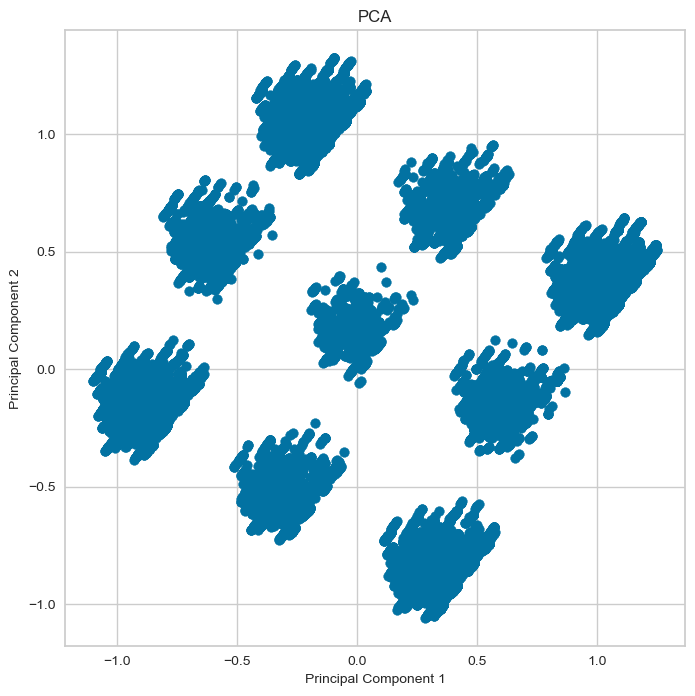

In [195]:
#APPLY THE PCA TO THE Y DATAFRAME WITH 2 COMPONENTS
pca = PCA(n_components=2, )
principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

#VISUALIZE THE PCA
plt.figure(figsize=(8, 8))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [196]:
pca = PCA().fit(scaled)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(Selected_X.columns)+1),
                      'Variance explained': pcaevr,'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.129635,0.129635
1,2,0.113127,0.242762
2,3,0.079586,0.322348
3,4,0.076563,0.398911
4,5,0.069233,0.468143
5,6,0.065390,0.533533
6,7,0.063748,0.597281
7,8,0.059845,0.657126
8,9,0.056969,0.714095
9,10,0.045756,0.759851


Text(0.5, 1.0, 'Explained variance by components')

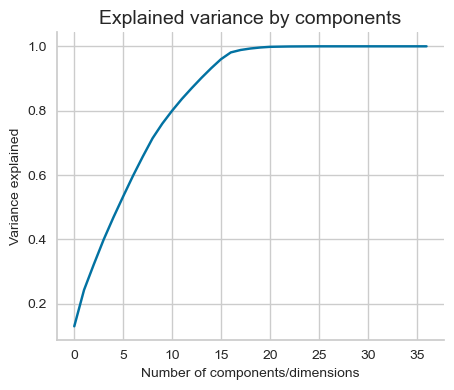

In [197]:
#PROFESSOR'S CODE
#Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Decoration
sns.despine()
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.title('Explained variance by components', fontsize=plots_Title_fontSize)

In [198]:
pca_reduced = PCA(n_components = 16)
pca_reduced.fit(scaled)
X_pca_reduced = pca_reduced.transform(scaled) 
print(X_pca_reduced.shape)

(73818, 16)


<a class="anchor" id="bestnumber">
    
## 4.2 Choosing the Best Number of Clusters
    
    
</a>

<a class="anchor" id="elbow">
    
## 4.2.1 Elbow Method
    
    
</a>

c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The 

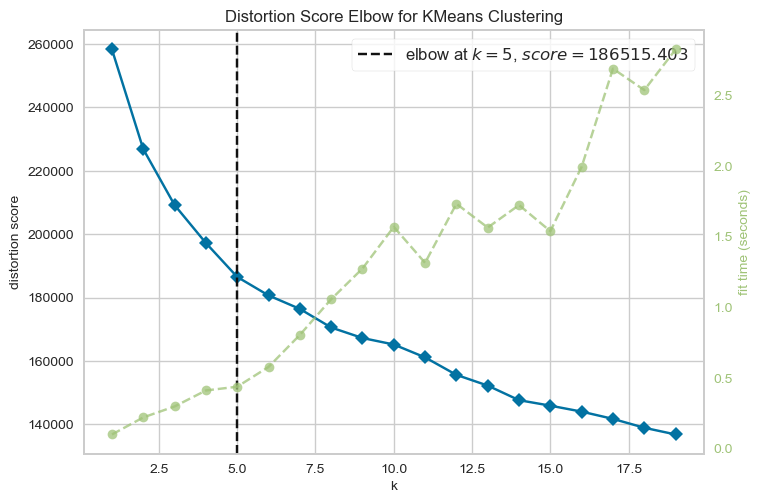

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [199]:
#PROFESSOR'S CODE
# Apply the Elbow method to select K
km = KMeans( random_state=123, init='k-means++')
visualizer = KElbowVisualizer(km, k=(1,20))
visualizer.fit(X_pca_reduced)
visualizer.show() 

<a class="anchor" id="davies">
    
## 4.2.2 Davies Bouldin Score
    
    
</a>

In [200]:
# Assuming X is your data
scores = []
range_values = range(2, 20)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=123 , init='k-means++').fit(X_pca_reduced)
    labels = kmeans.labels_
    scores.append(davies_bouldin_score(X_pca_reduced, labels))

# Find the number of clusters that gives the minimum score
optimal_clusters = scores.index(min(scores)) + 2

print(f"The optimal number of clusters is: {optimal_clusters}")


c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The 

The optimal number of clusters is: 19


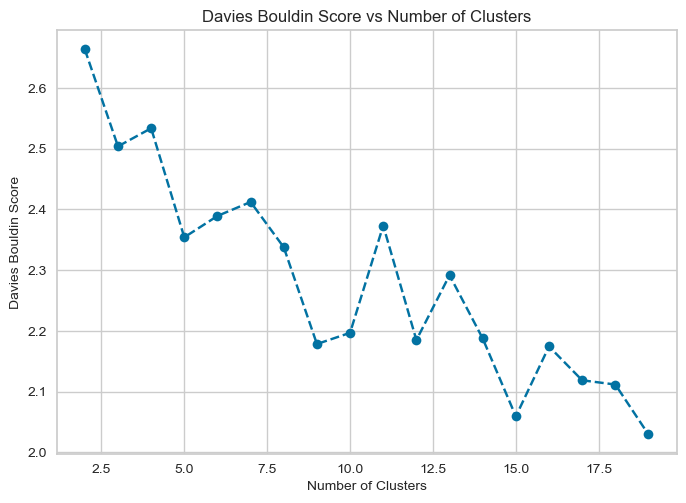

In [201]:
#plot the variance of the davies bouldin score
plt.plot(range_values, scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.title('Davies Bouldin Score vs Number of Clusters')
plt.show()

In [202]:
#Show a dataframe with the scores per number of clusters
scores_df = pd.DataFrame({'Number of Clusters': range_values, 'Davies Bouldin Score': scores})
scores_df


,Number of Clusters,Davies Bouldin Score
0,2,2.663385
1,3,2.503861
2,4,2.533694
3,5,2.354170
4,6,2.389338
5,7,2.412351
6,8,2.337741
7,9,2.178498
8,10,2.196947
9,11,2.373478


After evaluating with different amount of clusters, and using these two methods we chose to go with a number of 5 cluster for our customer segmentation

In [203]:
kmeans = KMeans(n_clusters=5, random_state=1, init='k-means++', algorithm='auto')
allDistances = kmeans.fit_transform(X_pca_reduced)
y_kmeans = kmeans.predict(X_pca_reduced)

c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


<a class="anchor" id="quality">
    
## 4.3 Assessing Cluster Quality
    
    
</a>

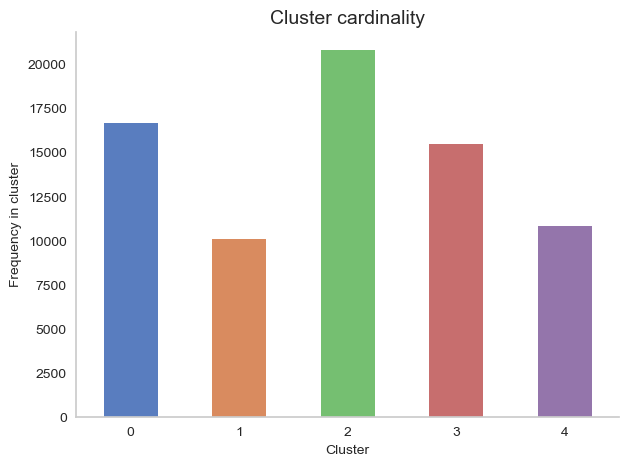

In [204]:
# Plot clusters cardinality 

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=y_kmeans, color='grey',width=0.5, palette='muted')
ax.grid(False)

sns.despine()
plt.title("Cluster cardinality", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=subPlots_label_fontSize)

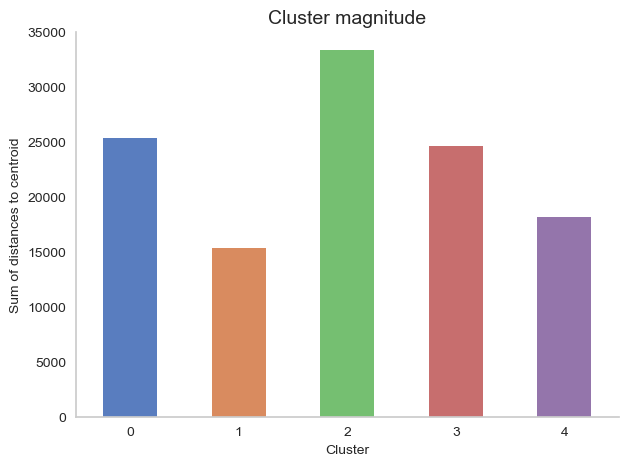

In [205]:
# Plot clusters magnitude

# Compute Magnitude
scaled['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = scaled['distanceToCentroid'].groupby(y_kmeans).sum()
scaled = scaled.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, width=0.5,color='grey', palette='muted')
ax.grid(False)

sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=subPlots_label_fontSize)

In [206]:
freqByCluster = scaled.groupby(y_kmeans).size()

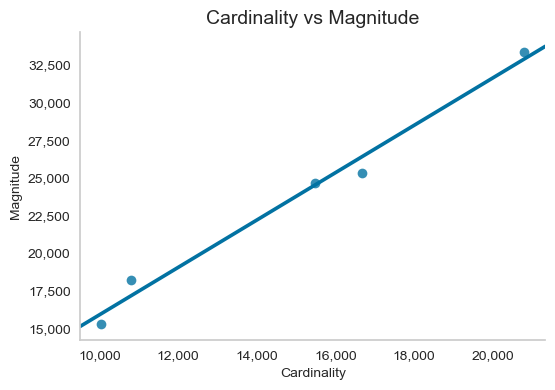

In [207]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)
ax.grid(False)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")

plt.rc('axes', labelsize=subPlots_label_fontSize)

<a class="anchor" id="results">
    
## 4.4 Clustering Results
    
    
</a>

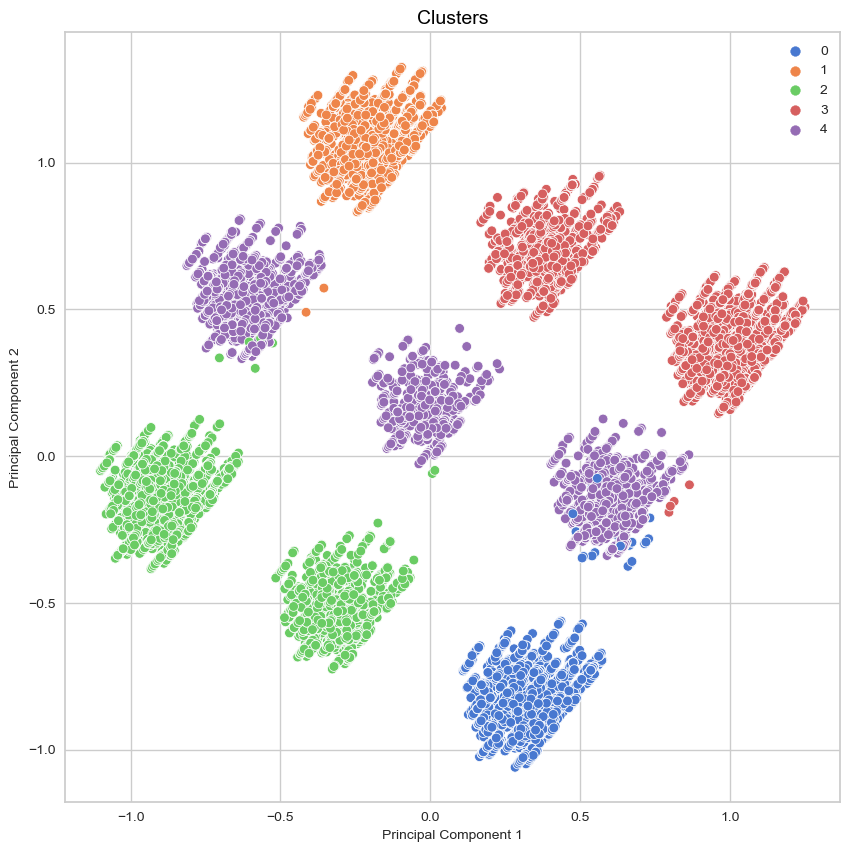

In [208]:
#visualize the clusters
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=principalDf['principal component 1'], y=principalDf['principal component 2'], hue=y_kmeans, palette='muted')
plt.title('Clusters', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.show()


In [209]:
# Create a dataframe with the weights per component
weights = pd.DataFrame(pca_reduced.components_, columns=Selected_X.columns)
weights


,Age_binned_<20y,Age_binned_20y-29y,Age_binned_30y-39y,Age_binned_40y-49y,Age_binned_50y-59y,Age_binned_>=60y,AverageLeadTime_binned_0-1m,AverageLeadTime_binned_1-6m,AverageLeadTime_binned_6m-1y,AverageLeadTime_binned_1y+,LodgingRevenue,OtherRevenue,RoomNights,Continent_DEU,Continent_FRA,Continent_GBR,Continent_PRT,Continent_RestOfEurope,Continent_RestOfTheWorld,TotalSR_binned_0,TotalSR_binned_1,TotalSR_binned_2,TotalSR_binned_2+,DaysSinceCreation_binned_0-1y,DaysSinceCreation_binned_1y-2y,DaysSinceCreation_binned_2y-3y,DaysSinceCreation_binned_3y+,BookingsCanceled_binned_0,BookingsCanceled_binned_1-3,BookingsCanceled_binned_3+,BookingsNoShowed_binned_0,BookingsNoShowed_binned_1,BookingsNoShowed_binned_2,BookingsCheckedIn_binned_1,BookingsCheckedIn_binned_2-6,BookingsCheckedIn_binned_6+,RevenuePerRoomNights
0,-0.002125,-0.013682,0.013388,0.080739,0.020594,-0.098915,0.351822,-0.322231,-0.023996,-0.005595,-0.005318,-0.004790,-0.038038,-0.013308,0.002699,-0.037735,0.114048,-0.017440,-0.048264,0.608832,-0.601514,-0.006330,-0.000988,-0.039014,-0.011193,0.026962,0.023244,-0.001022,0.001022,0.0,-0.000370,0.000316,0.000053,-0.015238,0.014875,0.000363,-0.005420
1,-0.000985,0.001074,0.043785,0.028673,-0.054025,-0.018523,0.560408,-0.638211,0.071910,0.005894,-0.004302,-0.002943,-0.048119,-0.022905,-0.020663,-0.004053,0.084444,-0.093780,0.056957,-0.336335,0.344877,-0.007916,-0.000625,0.089591,-0.046378,-0.033476,-0.009737,-0.001520,0.001520,-0.0,-0.000426,0.000407,0.000019,-0.026740,0.026201,0.000539,-0.004051
2,-0.001586,-0.027529,-0.093332,-0.228332,-0.040749,0.391528,-0.133134,-0.087719,0.178365,0.042488,-0.006480,0.003503,0.000775,0.210894,0.089763,0.067521,0.022812,-0.503860,0.112870,0.061218,-0.045416,-0.016716,0.000914,0.017186,-0.471755,0.411203,0.043366,0.000614,-0.000614,-0.0,-0.000047,0.000069,-0.000022,0.009421,-0.009409,-0.000012,-0.005718
3,-0.000479,0.000276,0.025275,0.152663,0.093540,-0.271274,0.071518,0.032839,-0.101664,-0.002693,0.000561,-0.000739,0.000737,-0.146800,-0.041217,-0.048857,-0.043422,0.436343,-0.156047,-0.089264,0.045322,0.042232,0.001711,-0.130742,-0.432093,0.642035,-0.079200,0.000275,-0.000275,0.0,0.000042,-0.000052,0.000010,0.020263,-0.020269,0.000006,0.000422
4,0.002123,0.044365,0.048263,0.108490,-0.166648,-0.036593,-0.018691,0.082907,-0.041748,-0.022467,0.000617,0.001302,0.012037,-0.000233,-0.029879,-0.051065,-0.019692,0.148719,-0.047850,0.058395,-0.025775,-0.032681,0.000061,0.708762,-0.528705,-0.328336,0.148280,0.000110,-0.000110,0.0,0.000023,-0.000077,0.000054,-0.007069,0.006880,0.000190,0.000642
5,0.000814,0.001227,-0.043627,-0.591072,0.732567,-0.099908,0.008050,-0.096703,0.096035,-0.007382,0.002594,0.001865,0.025961,0.078654,-0.048567,-0.012571,-0.091526,0.155161,-0.081150,0.000923,-0.015743,0.013676,0.001145,0.139685,-0.052192,-0.108780,0.021287,0.000924,-0.000924,-0.0,-0.000049,-0.000017,0.000066,0.001868,-0.001905,0.000037,0.002508
6,0.001950,-0.010235,-0.103518,-0.126744,-0.277442,0.515989,-0.095374,-0.237812,0.301158,0.032028,0.002455,0.003457,0.020418,0.082393,-0.251107,-0.043856,-0.232052,0.542198,-0.097576,0.049342,-0.066171,0.013640,0.003188,0.012152,0.112323,0.024049,-0.148524,0.001148,-0.001148,0.0,0.000266,-0.000330,0.000064,0.016831,-0.016297,-0.000534,0.002679
7,-0.003020,-0.055525,-0.264690,0.120341,0.071222,0.131672,-0.020459,-0.037384,0.056159,0.001684,-0.008463,0.000171,-0.028327,-0.007268,-0.032537,-0.053707,0.159382,0.125712,-0.191582,-0.006644,0.087215,-0.074279,-0.006293,-0.384770,-0.175563,-0.195444,0.755777,-0.000673,0.000673,-0.0,-0.000364,0.000319,0.000045,0.018280,-0.018202,-0.000078,-0.007783
8,-0.000528,0.029825,0.695234,-0.496516,-0.295386,0.067372,0.115934,0.084942,-0.198334,-0.002542,-0.005249,-0.004698,-0.020623,-0.113005,0.028757,-0.009645,-0.003443,0.082711,0.014624,0.013300,-0.008187,-0.003607,-0.001505,-0.175790,-0.060985,-0.009138,0.245913,0.000797,-0.000797,0.0,-0.000009,-0.000002,0.000011,0.019300,-0.019214,-0.000086,-0.005420
9,0.003347,-0.021743,0.338977,0.109

In [210]:
comp = abs(weights.iloc[15])  ## index 14 is component 15
comp = comp.sort_values(ascending=False)
comp

Continent_GBR                     0.630687
Age_binned_20y-29y                0.529561
Continent_PRT                     0.379873
AverageLeadTime_binned_6m-1y      0.207605
Age_binned_40y-49y                0.160904
Age_binned_>=60y                  0.146878
AverageLeadTime_binned_0-1m       0.143517
Continent_RestOfTheWorld          0.140846
Age_binned_50y-59y                0.125691
Age_binned_30y-39y                0.101191
Continent_FRA                     0.097629
TotalSR_binned_2                  0.043537
Continent_RestOfEurope            0.043091
AverageLeadTime_binned_1-6m       0.040253
DaysSinceCreation_binned_3y+      0.037004
DaysSinceCreation_binned_2y-3y    0.031415
Continent_DEU                     0.030753
TotalSR_binned_0                  0.026603
AverageLeadTime_binned_1y+        0.023835
DaysSinceCreation_binned_1y-2y    0.020633
DaysSinceCreation_binned_0-1y     0.015044
TotalSR_binned_1                  0.012612
RoomNights                        0.009844
Age_binned_

In [211]:
# Check the mean values of each cluster for the top relevant features
top_features = comp[:40].index
clustersMeanDF = pd.DataFrame(X_encoded[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

#ORDER THE DF PER CATEGORY BIN
clustersMeanDF = clustersMeanDF.reindex(sorted(clustersMeanDF.columns), axis=1)
clustersMeanDF.T

,0,1,2,3,4
Age_binned_20y-29y,0.099250,0.114470,0.108932,0.094358,0.055304
Age_binned_30y-39y,0.178891,0.244058,0.197769,0.228592,0.102007
Age_binned_40y-49y,0.240840,0.258081,0.213489,0.289472,0.164339
Age_binned_50y-59y,0.256732,0.223769,0.243871,0.240613,0.226117
Age_binned_<20y,0.006417,0.005370,0.007884,0.003942,0.007861
Age_binned_>=60y,0.217871,0.154252,0.228055,0.143023,0.444373
AverageLeadTime_binned_0-1m,0.000000,0.998807,0.000000,0.997997,0.000000
AverageLeadTime_binned_1-6m,0.994303,0.000000,0.999231,0.000000,0.000000
AverageLeadTime_binned_1y+,0.005697,0.001193,0.000769,0.002003,0.079719
AverageLeadTime_binned_6m-1y,0.000000,0.000000,0.000000,0.000000,0.920281


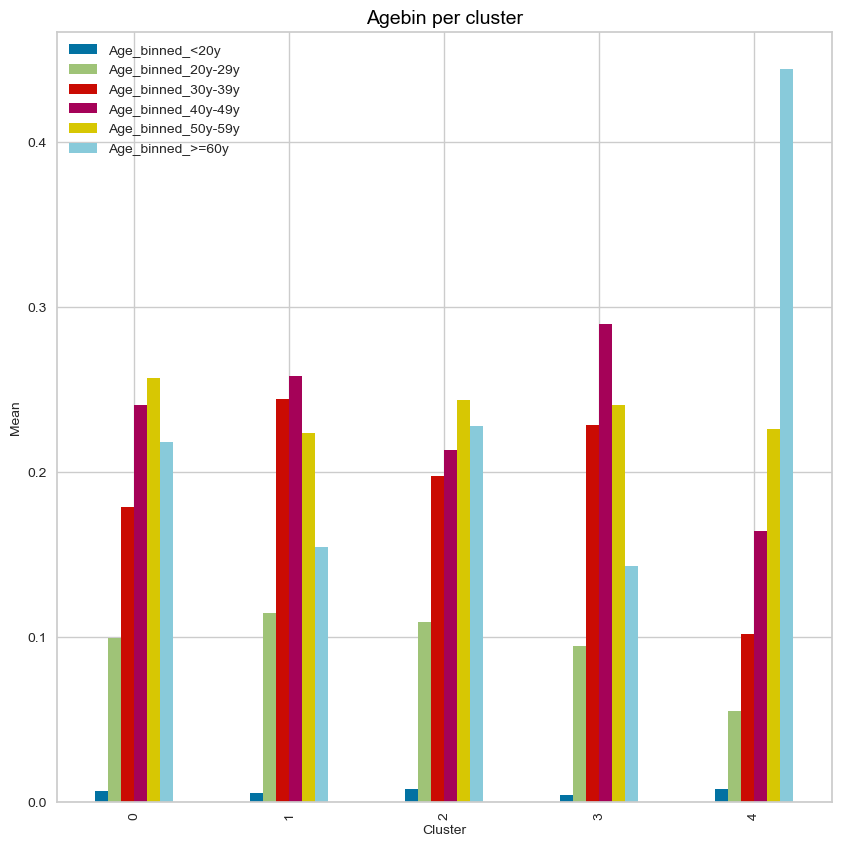

In [212]:
#plot Agebin_20-29	Agebin_30-39	Agebin_40-49	Agebin_50-59	Agebin_<20	Agebin_>=60 from clustersMeanDF
fig, ax = plt.subplots(figsize=(10, 10))
clustersMeanDF[['Age_binned_<20y','Age_binned_20y-29y','Age_binned_30y-39y','Age_binned_40y-49y','Age_binned_50y-59y','Age_binned_>=60y']].plot(kind='bar', ax=ax)
plt.title('Agebin per cluster', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
plt.xlabel('Cluster')
plt.ylabel('Mean')
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.show()

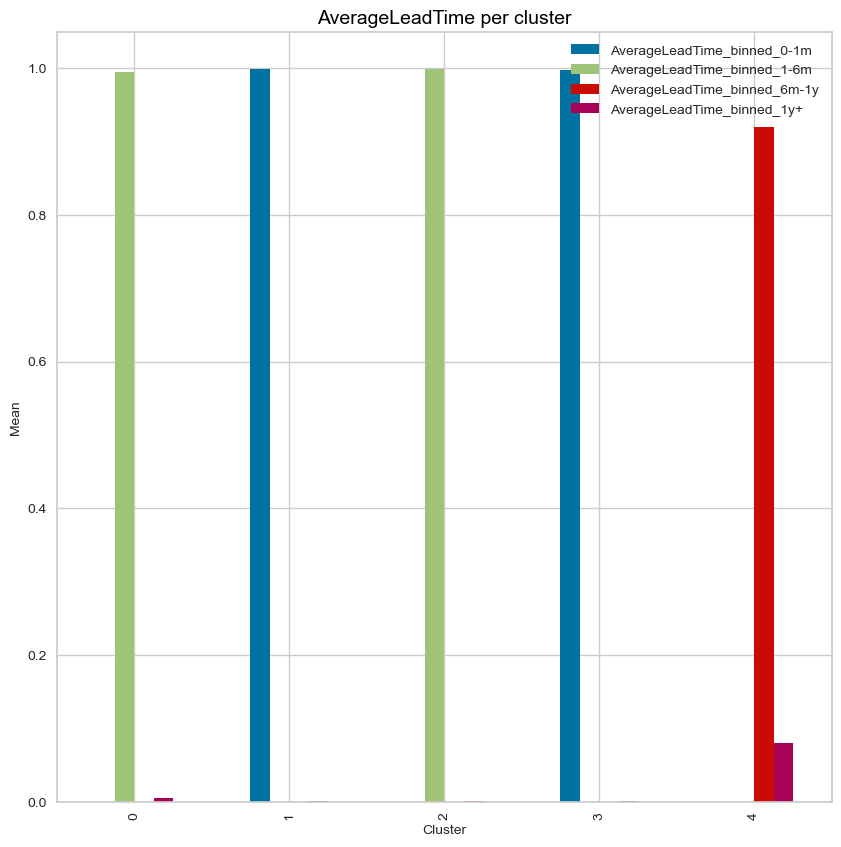

In [213]:
#plot AverageLeadTime_binned_0-1m	AverageLeadTime_binned_1-6m	AverageLeadTime_binned_6m-1y	AverageLeadTime_binned_1y+ from clustersMeanDF
fig, ax = plt.subplots(figsize=(10, 10))
clustersMeanDF[['AverageLeadTime_binned_0-1m','AverageLeadTime_binned_1-6m','AverageLeadTime_binned_6m-1y','AverageLeadTime_binned_1y+']].plot(kind='bar', ax=ax)
plt.title('AverageLeadTime per cluster', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
plt.xlabel('Cluster')
plt.ylabel('Mean')
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.show()


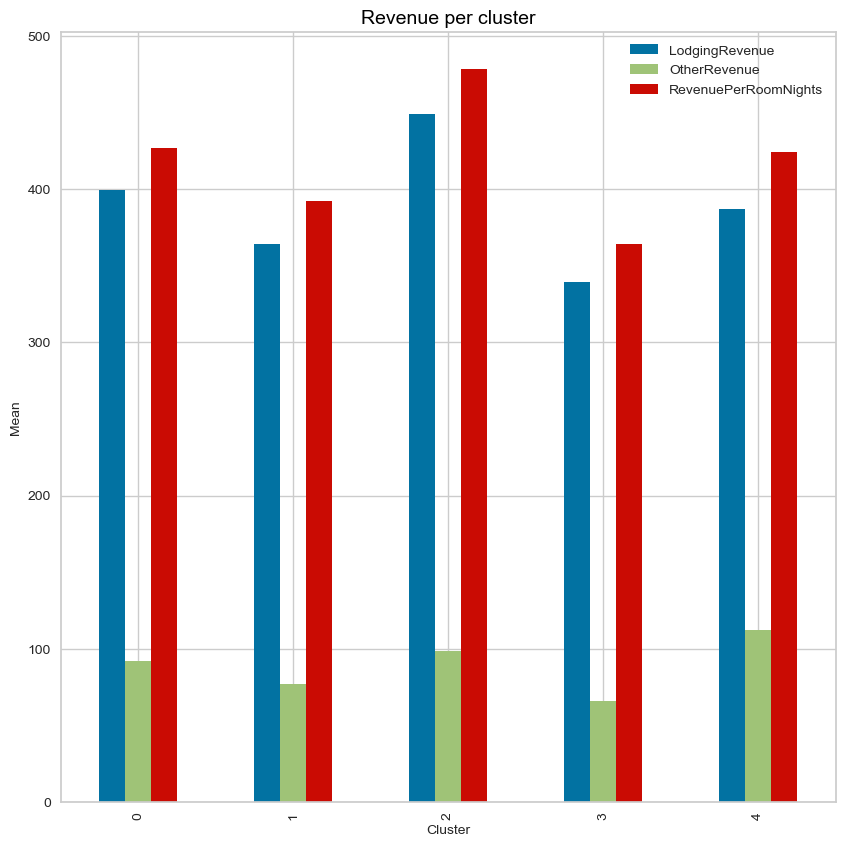

In [214]:
#plot LodgingRevenue otherrevenue revenue per room nights from clustersMeanDF
fig, ax = plt.subplots(figsize=(10, 10))
clustersMeanDF[['LodgingRevenue','OtherRevenue','RevenuePerRoomNights']].plot(kind='bar', ax=ax)
plt.title('Revenue per cluster', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
plt.xlabel('Cluster')
plt.ylabel('Mean')
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.show()



In [215]:
clustersMeanDF


,Age_binned_20y-29y,Age_binned_30y-39y,Age_binned_40y-49y,Age_binned_50y-59y,Age_binned_<20y,Age_binned_>=60y,AverageLeadTime_binned_0-1m,AverageLeadTime_binned_1-6m,AverageLeadTime_binned_1y+,AverageLeadTime_binned_6m-1y,BookingsCanceled_binned_0,BookingsCanceled_binned_1-3,BookingsCanceled_binned_3+,BookingsCheckedIn_binned_1,BookingsCheckedIn_binned_2-6,BookingsCheckedIn_binned_6+,BookingsNoShowed_binned_0,BookingsNoShowed_binned_1,BookingsNoShowed_binned_2,Continent_DEU,Continent_FRA,Continent_GBR,Continent_PRT,Continent_RestOfEurope,Continent_RestOfTheWorld,DaysSinceCreation_binned_0-1y,DaysSinceCreation_binned_1y-2y,DaysSinceCreation_binned_2y-3y,DaysSinceCreation_binned_3y+,LodgingRevenue,OtherRevenue,RevenuePerRoomNights,RoomNights,TotalSR_binned_0,TotalSR_binned_1,TotalSR_binned_2,TotalSR_binned_2+
0,0.099250,0.178891,0.240840,0.256732,0.006417,0.217871,0.000000,0.994303,0.005697,0.000000,0.999700,0.000300,0.0,0.971694,0.028186,0.000120,0.999880,0.000120,0.000000,0.140390,0.171994,0.098831,0.115502,0.351904,0.121379,0.218291,0.282459,0.284558,0.214693,399.550062,91.728970,427.045390,3.312024,1.000000,0.000000,0.000000,0.000000
1,0.114470,0.244058,0.258081,0.223769,0.005370,0.154252,0.998807,0.000000,0.001193,0.000000,0.996917,0.003083,0.0,0.937842,0.061064,0.001094,0.999204,0.000796,0.000000,0.067827,0.151069,0.086723,0.183491,0.315465,0.195425,0.289607,0.257782,0.255793,0.196818,364.340066,76.782059,392.424102,2.742317,0.000000,1.000000,0.000000,0.000000
2,0.108932,0.197769,0.213489,0.243871,0.007884,0.228055,0.000000,0.999231,0.000769,0.000000,0.999663,0.000337,0.0,0.970387,0.029613,0.000000,1.000000,0.000000,0.000000,0.111143,0.156571,0.119940,0.074176,0.349149,0.189020,0.230603,0.297760,0.280021,0.191616,449.159958,98.608488,478.581132,3.383280,0.000000,0.814777,0.169070,0.016152
3,0.094358,0.228592,0.289472,0.240613,0.003942,0.143023,0.997997,0.000000,0.002003,0.000000,0.997609,0.002391,0.0,0.932592,0.066632,0.000776,0.999160,0.000711,0.000129,0.085116,0.141731,0.066374,0.249467,0.298132,0.159181,0.234796,0.273961,0.288373,0.202870,339.044374,65.852588,364.144384,2.557681,0.842952,0.000000,0.144187,0.012861
4,0.055304,0.102007,0.164339,0.226117,0.007861,0.444373,0.000000,0.000000,0.079719,0.920281,0.999908,0.000092,0.0,0.977989,0.022011,0.000000,1.000000,0.000000,0.000000,0.314899,0.096920,0.153149,0.069731,0.244983,0.120318,0.242393,0.253029,0.326459,0.178119,387.286758,112.504931,424.220423,3.233053,0.388976,0.513271,0.087210,0.010543


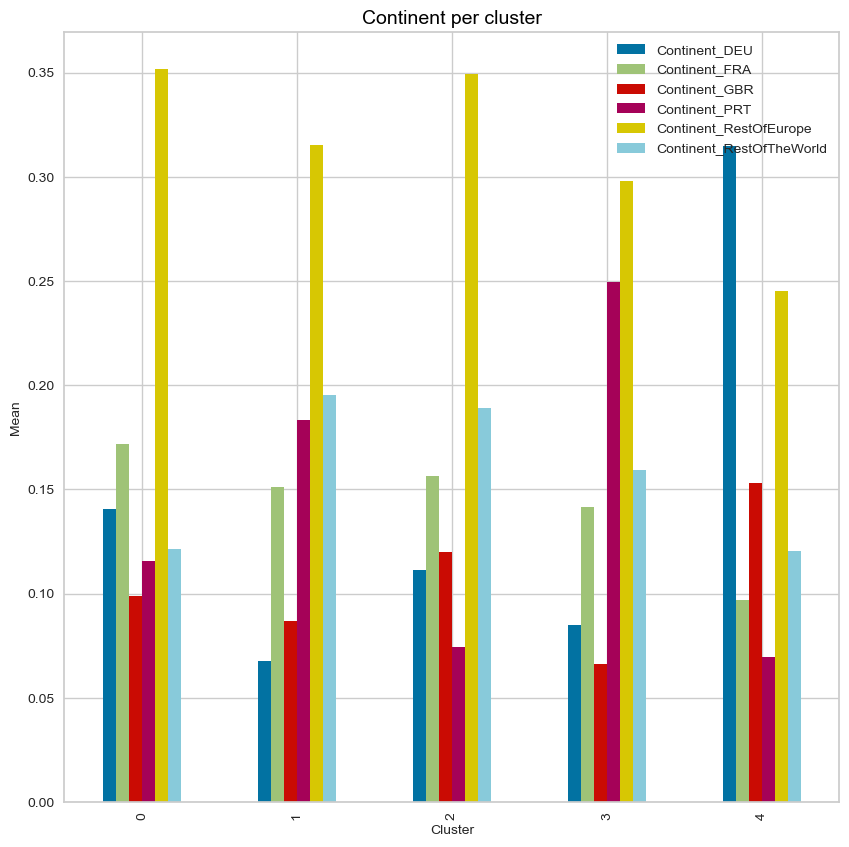

In [216]:
#plot continent from clustersMeanDF
fig, ax = plt.subplots(figsize=(10, 10))
clustersMeanDF[['Continent_DEU', 'Continent_FRA', 'Continent_GBR','Continent_PRT', 'Continent_RestOfEurope', 'Continent_RestOfTheWorld']].plot(kind='bar', ax=ax)
plt.title('Continent per cluster', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
plt.xlabel('Cluster')
plt.ylabel('Mean')
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.show()


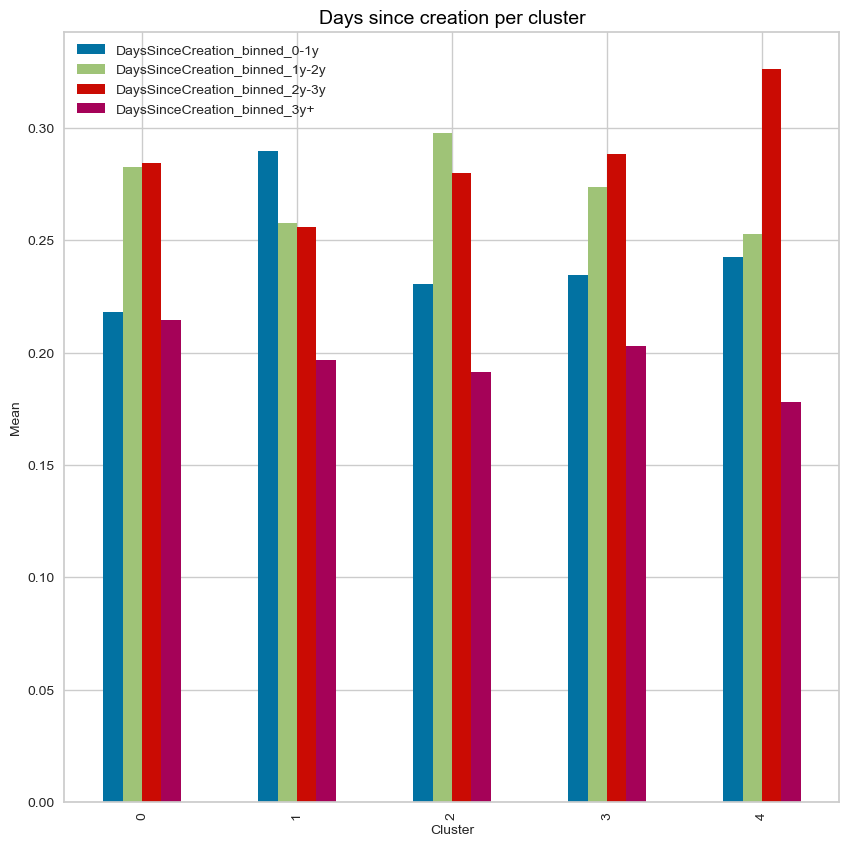

In [217]:
#plot days since creation from clustersMeanDF
fig, ax = plt.subplots(figsize=(10, 10))
clustersMeanDF[['DaysSinceCreation_binned_0-1y', 'DaysSinceCreation_binned_1y-2y','DaysSinceCreation_binned_2y-3y', 'DaysSinceCreation_binned_3y+']].plot(kind='bar', ax=ax)
plt.title('Days since creation per cluster', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
plt.xlabel('Cluster')
plt.ylabel('Mean')
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.show()

